
# Aaron Gordon's 2023/2024 Season Analysis

Aaron Gordon, a versatile power forward for the Denver Nuggets, played a pivotal role in the team's success during the 2023/2024 NBA season. His contributions on both ends of the court significantly impacted the Nuggets' performance in regular season games and playoff matchups.

In this analysis, we will delve into Aaron Gordon's statistical achievements, highlight standout moments, and explore his impact on team dynamics. By examining his scoring, rebounding, defensive prowess, and overall efficiency, we aim to gain insights into how Gordon influenced the Nuggets' quest for victory.

Let's dive into the data and uncover the story behind Aaron Gordon's performance during this exciting season.




<img src="snapshot30.png"  >

In [98]:
import numpy as np
import pandas as pd 


gordon_regular_season_df = pd.read_csv('Aaron regular season.csv')
gordon_playoffs_df = pd.read_csv("gordon.csv")


In [99]:
#Show all columns
pd.set_option("display.max_columns", None)

In [101]:
gordon_regular_season_df

,Date,Age,Tm,Unnamed: 3,Opp,Unnamed: 5,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,10/24/2023,28,DEN,NaN,LAL,W (+12),1,34:59:00,7,11,0.636,1,2,0.5,0,0,NaN,2,5,7,5,2,1,0,0,15,19.2,6
1,10/27/2023,28,DEN,@,MEM,W (+4),1,30:20:00,5,11,0.455,0,1,0.0,0,1,0.000,1,1,2,3,3,1,1,3,10,8.5,8
2,10/29/2023,28,DEN,@,OKC,W (+33),1,23:05,4,7,0.571,0,1,0.0,1,3,0.333,1,2,3,2,1,3,1,1,9,9.3,22
3,10/30/2023,28-044,DEN,NaN,UTA,W (+8),1,33:12:00,10,12,0.833,0,0,NaN,1,4,0.250,3,4,7,2,0,0,3,2,21,16.3,8
4,11/1/2023,28-046,DEN,@,MIN,L (-21),1,18:27,2,3,0.667,0,1,0.0,0,0,NaN,1,1,2,2,0,1,2,4,4,2.2,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4/2/2024,28-199,DEN,NaN,SAS,W (+5),1,33:03:00,9,12,0.750,2,4,0.5,3,3,1.000,2,5,7,4,1,1,0,3,23,24.4,11
69,4/4/2024,28-201,DEN,@,LAC,L (-2),1,35:36:00,5,10,0.500,0,2,0.0,8,14,0.571,2,4,6,7,1,2,1,4,18,17.9,1
70,4/10/2024,28-207,DEN,NaN,MIN,W (+9),1,27:58:00,2,7,0.286,0,2,0.0,1,2,0.500,1,4,5,9,1,0,2,0,5,7.7,9
71,4/12/2024,28-209,DEN,@,SAS,L (-1),1,28:55:00,6,6,1.000,1,1,1.0,0,0,NaN,2,2,4,4,1,0,0,1,13,16.6,1


# Cleaning The Data

In [102]:
#Renaming some  columns
gordon_regular_season_df.rename(columns={"Unnamed: 3" : "Hm/Aw"}, inplace=True)

In [103]:
gordon_regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        73 non-null     object 
 1   Age         73 non-null     object 
 2   Tm          73 non-null     object 
 3   Hm/Aw       38 non-null     object 
 4   Opp         73 non-null     object 
 5   Unnamed: 5  73 non-null     object 
 6   GS          73 non-null     int64  
 7   MP          73 non-null     object 
 8   FG          73 non-null     int64  
 9   FGA         73 non-null     int64  
 10  FG%         73 non-null     float64
 11  3P          73 non-null     int64  
 12  3PA         73 non-null     int64  
 13  3P%         60 non-null     float64
 14  FT          73 non-null     int64  
 15  FTA         73 non-null     int64  
 16  FT%         63 non-null     float64
 17  ORB         73 non-null     int64  
 18  DRB         73 non-null     int64  
 19  TRB         73 non-null     int

In [104]:
gordon_regular_season_df['Age']= (gordon_regular_season_df['Age'].str.split('-').str[0]).astype(int)
gordon_regular_season_df['MP']= (gordon_regular_season_df['MP'].str.split(':').str[0]).astype(int)

In [105]:
gordon_regular_season_df['FG%'] = gordon_regular_season_df['FG%']*100
gordon_regular_season_df['FT%'] = gordon_regular_season_df['FT%']*100
gordon_regular_season_df['3P%'] = gordon_regular_season_df['3P%']*100

In [106]:
gordon_regular_season_df['Hm/Aw'] = gordon_regular_season_df['Hm/Aw'].fillna('HM')

In [107]:
gordon_regular_season_df

,Date,Age,Tm,Hm/Aw,Opp,Unnamed: 5,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,10/24/2023,28,DEN,HM,LAL,W (+12),1,34,7,11,63.6,1,2,50.0,0,0,NaN,2,5,7,5,2,1,0,0,15,19.2,6
1,10/27/2023,28,DEN,@,MEM,W (+4),1,30,5,11,45.5,0,1,0.0,0,1,0.0,1,1,2,3,3,1,1,3,10,8.5,8
2,10/29/2023,28,DEN,@,OKC,W (+33),1,23,4,7,57.1,0,1,0.0,1,3,33.3,1,2,3,2,1,3,1,1,9,9.3,22
3,10/30/2023,28,DEN,HM,UTA,W (+8),1,33,10,12,83.3,0,0,NaN,1,4,25.0,3,4,7,2,0,0,3,2,21,16.3,8
4,11/1/2023,28,DEN,@,MIN,L (-21),1,18,2,3,66.7,0,1,0.0,0,0,NaN,1,1,2,2,0,1,2,4,4,2.2,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4/2/2024,28,DEN,HM,SAS,W (+5),1,33,9,12,75.0,2,4,50.0,3,3,100.0,2,5,7,4,1,1,0,3,23,24.4,11
69,4/4/2024,28,DEN,@,LAC,L (-2),1,35,5,10,50.0,0,2,0.0,8,14,57.1,2,4,6,7,1,2,1,4,18,17.9,1
70,4/10/2024,28,DEN,HM,MIN,W (+9),1,27,2,7,28.6,0,2,0.0,1,2,50.0,1,4,5,9,1,0,2,0,5,7.7,9
71,4/12/2024,28,DEN,@,SAS,L (-1),1,28,6,6,100.0,1,1,100.0,0,0,NaN,2,2,4,4,1,0,0,1,13,16.6,1


# Exploratory Data Analysis

In [108]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.transforms as transforms
from matplotlib import style
from matplotlib import colormaps
import matplotlib.gridspec as gridspec
style.use('ggplot')

%matplotlib inline
#sns.set_palette("dark")
#style.use('ggplot')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.weight'] = 'bold'
#matplotlib.rcParams['figure.figsize'] = (50, 20)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [109]:
total_stat = gordon_regular_season_df[['MP', 'PTS','FGA','FG','3P','3PA',  'FT', 'FTA','ORB','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']].sum().astype(int)
total_stats = total_stat.reset_index()
total_stats.columns = ['statistics', 'values']
total_stats

,statistics,values
0,MP,2263
1,PTS,1013
2,FGA,716
3,FG,398
4,3P,40
5,3PA,138
6,FT,177
7,FTA,269
8,ORB,174
9,TRB,471


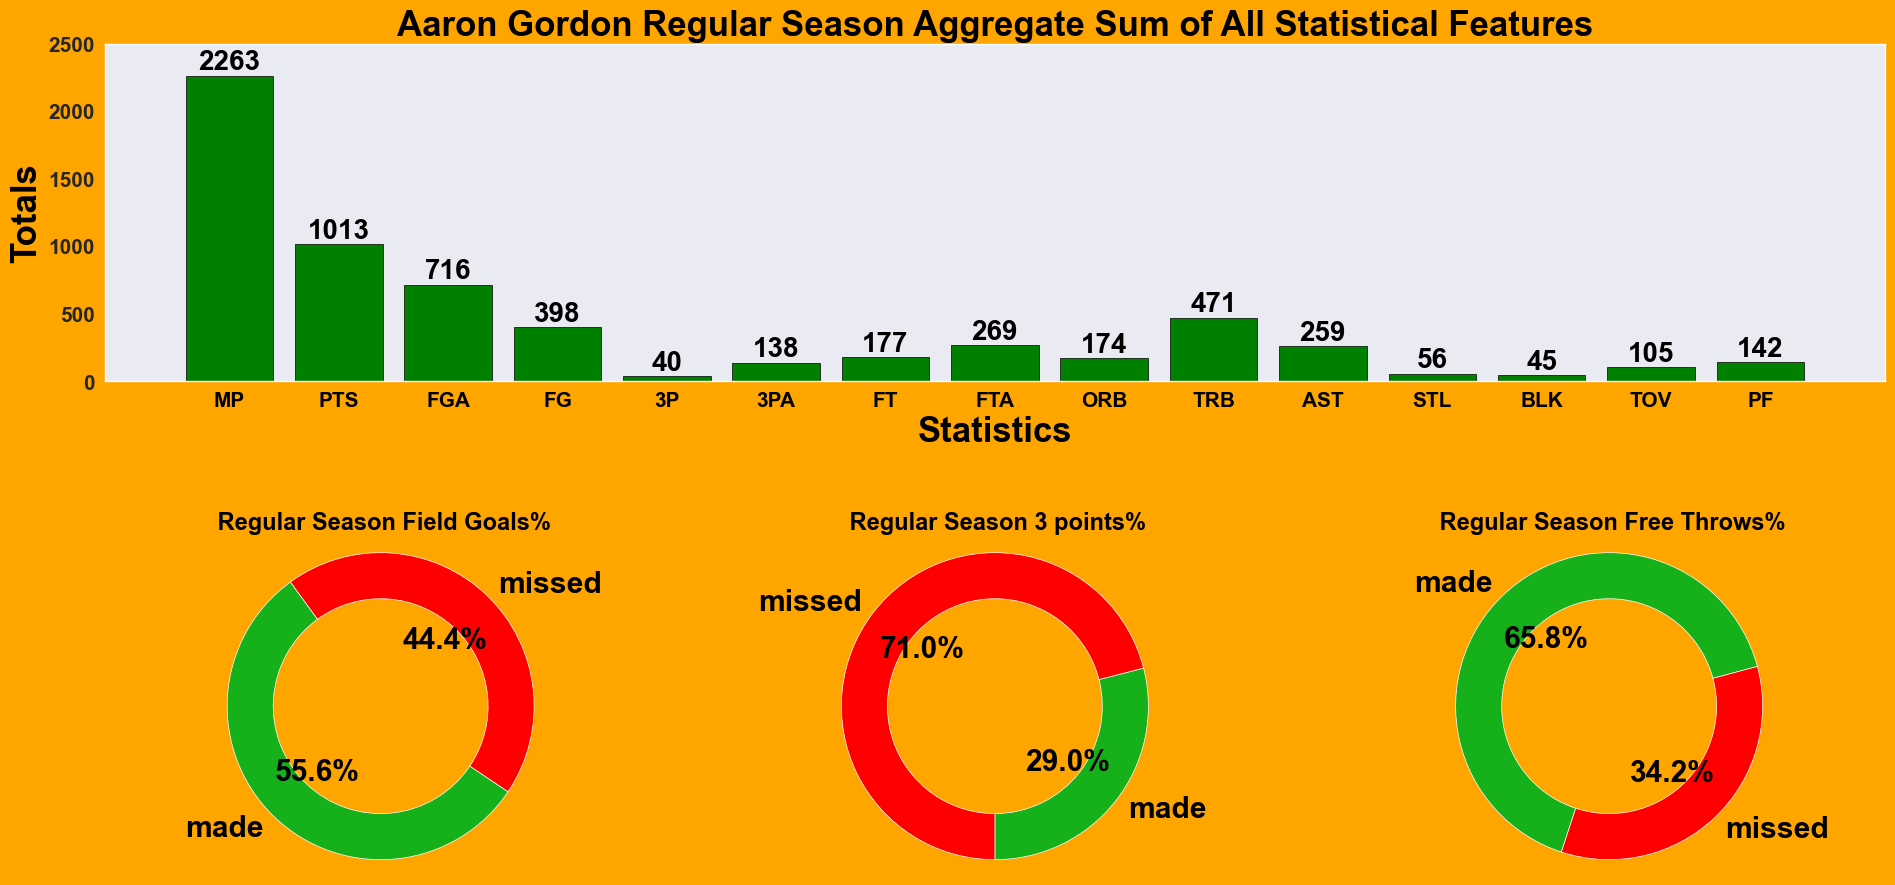

In [110]:
# Define the fg_percent function to return data
def fg_percent(fg_made, fg_attempted):
    made_percentage = (fg_made / fg_attempted) * 100
    missed_percentage = 100 - made_percentage
    labels = ['made', 'missed']
    sizes = [made_percentage, missed_percentage]
    colors = ['#15B01A', 'red']
    return {'sizes': sizes, 'labels': labels, 'colors': colors}

# Create a figure
fig = plt.figure(figsize=(20, 10),facecolor='orange')

# Set the spacing between subplots
plt.subplots_adjust(hspace=20)  # Adjust the value as needed

# Define the grid layout
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0, :])  # Adjust the width for ax1
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
#######################################################################################
######################################################################################

# Melting  the DataFrame to create a clean format

colors= ['red', 'green']
ax1.bar(total_stats['statistics'], total_stats['values'], color='green', edgecolor='black')
# Add value labels on top of each bar
for i, value in enumerate(total_stats['values']):
    ax1.text(i, value, str(value), ha='center', va='bottom', fontsize=20, color='black')
    
# Customize the plot
ax1.set_xlabel('Statistics',fontsize=25, fontweight='bold', color='black')
ax1.set_ylabel('Totals',fontsize=25, fontweight='bold', color='black')
ax1.set_title("Aaron Gordon Regular Season Aggregate Sum of All Statistical Features",fontsize=25,fontweight='bold', color='black')
ax1.tick_params(axis='x', colors='black',);

ax1.set_ylim(0, 2500)
ax1.grid(False)
###################################################

#######################################################################################
##########################################################################################
# Plot the pie chart for ax1
data1 = fg_percent(total_stats.iloc[3, 1], total_stats.iloc[2, 1])
ax2.pie(data1['sizes'], labels=data1['labels'],
        colors=data1['colors'],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%', 
        textprops={'size': 'x-large', 'color': 'black'},startangle=126)
ax2.set_title(' Regular Season Field Goals%',fontweight='bold',fontsize=17,color='black')
ax2.axis('equal')
#######################################################################################
# Plot the pie chart for ax2
data2 = fg_percent(total_stats.iloc[4, 1], total_stats.iloc[5, 1])
ax3.pie(data2['sizes'], labels=data2['labels'],
        colors=data2['colors'],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%', 
        textprops={'size': 'x-large', 'color': 'black'},startangle=270)
ax3.set_title(' Regular Season 3 points%',fontweight='bold',fontsize=17,color='black')
ax3.axis('equal')

#######################################################################################
# Plot the pie chart for ax3
data3 = fg_percent(total_stats.iloc[6, 1], total_stats.iloc[7, 1])
ax4.pie(data3['sizes'], labels=data3['labels'],
        colors=data3['colors'],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%', 
        textprops={'size': 'x-large', 'color': 'black'},startangle=15)
ax4.set_title(' Regular Season Free Throws%',fontweight='bold',fontsize=17,color='black')
ax4.axis('equal')


fig.tight_layout(pad=3)

# Show the plot
plt.show()

Aaron Gordon's 2023/2024 regular season performance based on the aggregate sum of their statistical features:

1. **Minutes Played (MP):** Aaron Gordon played a total of 2263 minutes during the regular season.
2. **Points (PTS):** Scored a total of 1013 points.
3. **Field Goals Attempted (FGA):**  Attempted 716 field goals.
4. **Field Goals Made (FG):** Out of those attempts, he made 398.
5. **Field Goals Percentage (FG%):** Percentage field goals success rate was slightly above 50% meaning he scored more than half of his FGAs.
7. **Three-Point Shots Attempted (3PA):** 138 three-point shots attempted .
8. **Three-Point Shots Made (3P):** Successfully made 40 three-point shots.
4. **Three-Point Percentage (3P%):** Poor 3 points shooting performance during the regular season. Reason behind this maybe because of the position he plays on the team.

These statistics provide a snapshot of the Aaron Gordon's performance across various aspects of the game.  🏀🏀🐼👨‍💻

## Checking the overall statitical summary of all games played in regular season.

In [111]:
gordon_regular_season_df.describe()

,Age,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
count,73.0,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,60.000000,73.000000,73.000000,63.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,28.0,1.0,31.000000,5.452055,9.808219,57.905479,0.547945,1.890411,26.246667,2.424658,3.684932,62.663492,2.383562,4.068493,6.452055,3.547945,0.767123,0.616438,1.438356,1.945205,13.876712,13.042466,5.794521
std,0.0,0.0,5.158596,2.154073,3.584913,19.577857,0.707914,1.369932,30.059447,2.191637,2.727823,31.162282,1.830529,2.382394,3.197400,1.993330,0.874334,0.891786,1.154536,1.393341,5.270318,5.535515,13.384235
min,28.0,1.0,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-3.900000,-28.000000
25%,28.0,1.0,28.000000,4.000000,8.000000,46.200000,0.000000,1.000000,0.000000,1.000000,2.000000,50.000000,1.000000,2.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,11.000000,9.800000,-2.000000
50%,28.0,1.0,32.000000,5.000000,10.000000,58.300000,0.000000,2.000000,25.000000,2.000000,3.000000,66.700000,2.000000,4.000000,6.000000,3.000000,1.000000,0.000000,1.000000,2.000000,14.000000,12.700000,7.000000
75%,28.0,1.0,35.000000,7.000000,12.000000,70.000000,1.000000,3.000000,50.000000,3.000000,6.000000,86.600000,3.000000,5.000000,9.000000,5.000000,1.000000,1.000000,2.000000,3.000000,17.000000,16.800000,16.000000
max,28.0,1.0,41.000000,11.000000,21.000000,100.000000,2.000000,6.000000,100.000000,8.000000,14.000000,100.000000,8.000000,12.000000,15.000000,9.000000,3.000000,4.000000,4.000000,6.000000,30.000000,28.100000,40.000000


In [112]:
stat_view = gordon_regular_season_df.describe()
stat_view.drop(columns=['Age', "FG%", "3P%", "FT%","GS", "GmSc" ], inplace=True)

In [113]:
heatmap = stat_view.loc[[ 'mean', 'std', 'min', '25%', '50%', '75%', 'max',]].astype(int)
heatmap

,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
mean,31,5,9,0,1,2,3,2,4,6,3,0,0,1,1,13,5
std,5,2,3,0,1,2,2,1,2,3,1,0,0,1,1,5,13
min,18,0,3,0,0,0,0,0,0,1,0,0,0,0,0,2,-28
25%,28,4,8,0,1,1,2,1,2,4,2,0,0,1,1,11,-2
50%,32,5,10,0,2,2,3,2,4,6,3,1,0,1,2,14,7
75%,35,7,12,1,3,3,6,3,5,9,5,1,1,2,3,17,16
max,41,11,21,2,6,8,14,8,12,15,9,3,4,4,6,30,40


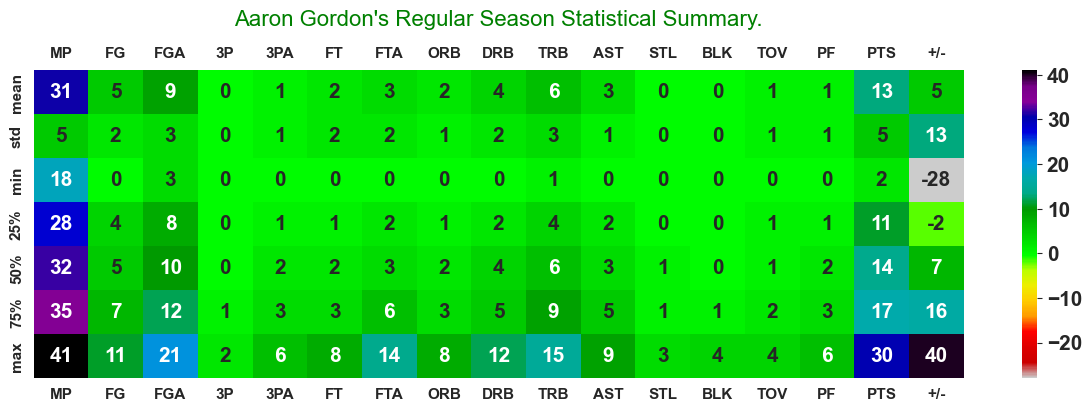

In [114]:
plt.figure(figsize=(15, 4))
plt.tick_params(axis='both', which='major', labelsize=11,labelbottom=True, bottom=False, top=False, labeltop=True)


ax = sns.heatmap(heatmap, annot=True, fmt="d", cmap='nipy_spectral_r').set_title("Aaron Gordon's Regular Season Statistical Summary.", fontdict={'size': 16},pad=15, color='green' );

The chart above shows the statitical summary of the **A. Gordon's** 2023/2024 regular season. These colors represent different levels of performance.

**Regular season performace:**

1. **Minutes Played (MP)**: 
   - He averaged  **31 minutes per game**.
   - His **highest-minutes game was 41 minutes**, while the **lowest-minutes played was 18 minute**.



1. **Points (Pts)**:
   - He averaged  **13 points per game**.
   - His **highest-scoring game was 30 points**, while the **lowest-scoring game was 2 points**.


2. **Field Goals (FG)**:
   - Gordon in the regular season  recorded an average of 5 field goals made per game. 
   - His best game saw **11 successful field goals made**, while his lowest made had only **0**.


3. **Offensive Rebounds (ORB)**:
   - On average, the Nuggets secured **2 offensive rebounds per game**.
   - Their best game had **8 offensive rebounds, while their worst game had 0**.

4. **Total Rebounds (TRB)**:
    - He averaged **6 total rebounds per game**.
    - His **highest rebound count was 15**, and his **lowest was 1**.




This statitical  summary provides a comprehensive overview of Aaron Gordon's performance across various metrics during the regular season. 🏀🔥


Next, i plan to group the games based on metrics such as date, home or away status, opponents, and win/loss outcomes to show his performance over the season and to  identify trends.



In [115]:
gordon_group_df = gordon_regular_season_df.groupby(["Date","Hm/Aw","Opp"])[['MP','PTS','FGA','FG','3P','3PA', 'FT', 'FTA', 'ORB','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']].sum().astype(int)
gordon_group_df

,,,MP,PTS,FGA,FG,3P,3PA,FT,FTA,ORB,TRB,AST,STL,BLK,TOV,PF
Date,Hm/Aw,Opp,,,,,,,,,,,,,,,
1/1/2024,HM,CHO,24,10,5,4,1,1,1,2,1,2,0,1,1,0,0
1/10/2024,@,UTA,28,12,6,5,2,2,0,0,2,5,4,1,0,2,4
1/12/2024,HM,NOP,30,15,12,7,0,2,1,3,3,5,2,0,0,2,2
1/14/2024,HM,IND,37,20,10,7,0,1,6,8,1,10,3,0,0,2,0
1/16/2024,@,PHI,38,16,11,7,0,1,2,6,3,6,4,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/10/2024,HM,MIN,27,5,7,2,0,2,1,2,1,5,9,1,0,2,0
4/12/2024,@,SAS,28,13,6,6,1,1,0,0,2,4,4,1,0,0,1
4/14/2024,@,MEM,26,15,6,4,0,1,7,8,3,5,5,0,1,1,2


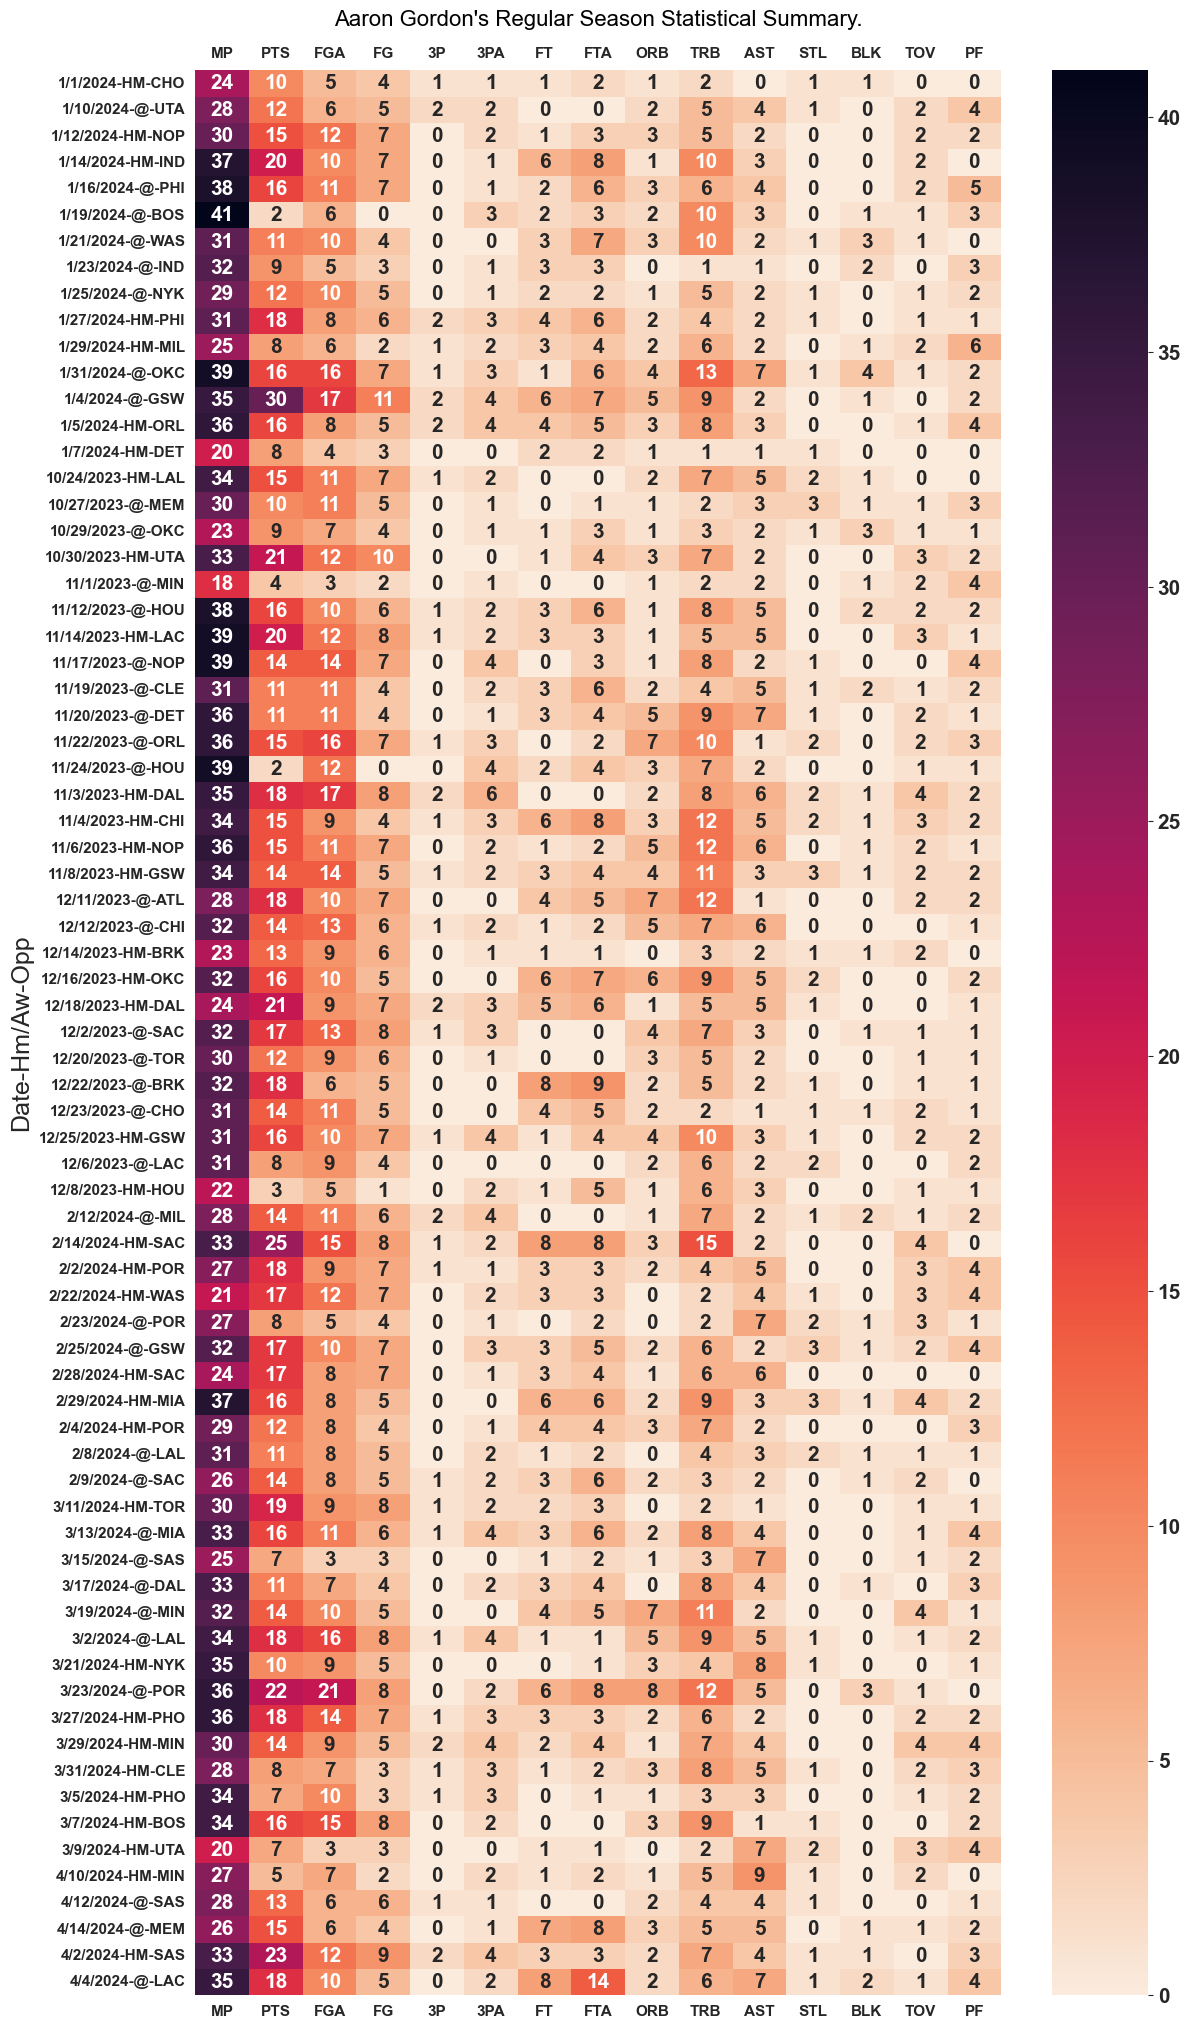

In [116]:
plt.figure(figsize=(13, 25))
plt.tick_params(axis='both', which='major', labelsize=11,labelbottom=True, bottom=False, top=False, labeltop=True)


sns.heatmap(gordon_group_df, annot=True,fmt="d",  cmap='rocket_r').set_title("Aaron Gordon's Regular Season Statistical Summary.", fontdict={'size': 16},pad=15, color='#000' );

### Performance Trends
   - The heatmap above displays various basketball statistics, including points (PTS), rebounds (REB), assists (AST), field goals made (FGM), three-pointers made (3PM), free throws made (FTM), and the likes.
   - Each row corresponds to a different game, with dates and opposing teams listed on the left.
   - The intensity of colors reflects Gordon's performance in each statistical category for that game.


## Highest-scoring game:

   **Golden State Warriors** (January 4, 2024):
   - Aaron Gordon had his highest point game total of **30 points** in a game against the Golden State warriors, which took place at away court.


## Lowest-scoring games:

**Houston Rockets** (November 24 2023):
   - Played **39** minutes, scored **2** points and **7** rebounds.

**Boston Celtics** (January 4, 2024):
   - Played **41** minutes, scored total of **2 points** and **10 rebounds**.
   
## Rebounds 
**Sacramento Kings** (Febuary 14 2024):
   - Highest rebounds of the regular season **15**

**Indiana Pacers** (January 23, 2024):
   -  **32** minutes and total of ***1 rebounds***.





**Scoring Performance**: Aaron Gordon's scoring ability is highlighted by his **30-point** game against the Golden State Warriors, indicating a strong offensive performance. However, this contrasts with two low-scoring games where he only scored **2 points** against both the Houston Rockets and Boston Celtics, despite playing significant minutes (39 and 41 respectively). This suggests inconsistency in scoring.


**Playing Time**: Gordon's playing time does not seem to correlate directly with his scoring, as seen in the games against the Rockets and Celtics where he played a lot of minutes but scored 2 points each.


**Rebounding Ability**: His rebounding performance shows variability. He secured a season-high **15 rebounds** against the Sacramento Kings. Yet, there was a game against the Indiana Pacers where he only managed **1 rebound** in 32 minutes, which could point to an off night or strong opposition defense.


**Overall Assessment**: Gordon shows potential for high-scoring games and strong rebounding but also has instances of low productivity. This could be due to various factors such as the opposing team's defense, his physical condition during the games, or the strategies employed by his own team.


Next I'll be  exploring his  home and away statistics, and extreme performances in various game stats.**🏀🏀🐼👨‍💻**

# Home and Away Games Performance Insights:





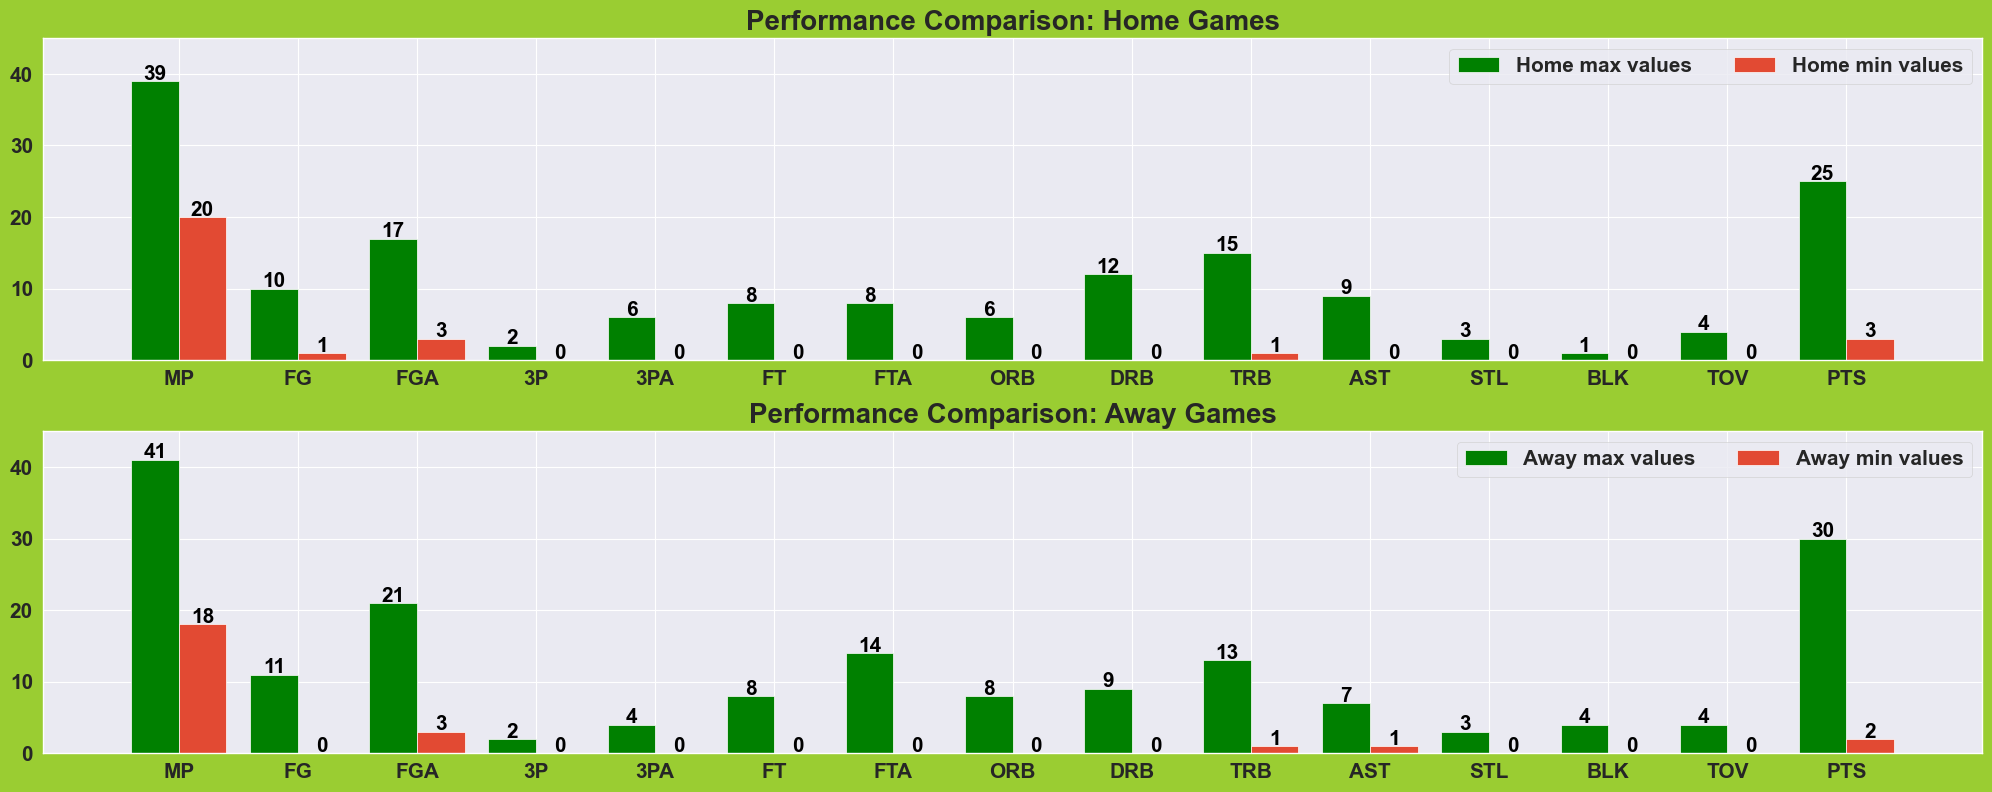

In [117]:
#Displaying the plots in a subplots
def subplots():
        # Create a figure
        fig = plt.figure(figsize=(20,8));
        fig.set_facecolor("yellowgreen")
        
        
        plt.rcParams.update({'font.size': 10, })

        # Defining the grid layout with different width ratios for each row
    
        gs = gridspec.GridSpec(2, 2)


        # Create subplots
        ax1 = fig.add_subplot(gs[0, :]);
        ax2 = fig.add_subplot(gs[1, :]);
        
        
######################################################################################################
####################### FREQUENCY DISTRIBUTION OF PERFORMANCES IN HOME GAMES #########################
######################################################################################################
        home_games = gordon_regular_season_df[gordon_regular_season_df['Hm/Aw'] == 'HM' ]
        home_game = home_games.describe()
        home_game.drop(columns=['Age', "GS", "PF","GmSc","+/-","3P%", "FG%", "FT%" ], inplace=True)
        home_game = (home_game.loc[[ 'max', 'min']]).astype(int)



        # Accessing the indexes and values of the away game data
        stats =home_game.loc['max'].index
        home_max_values = home_game.loc['max'].values
        home_min_values = home_game.loc['min'].values
        y = np.arange(len(stats))  # The label locations
        width = 0.4  # The width of the bars

        # Plot the bars for each attribute
        bar3 = ax1.bar(y - width, home_max_values, width, label='Home max values', color='green')
        bar4 = ax1.bar(y, home_min_values, width, label='Home min values')

        # Add value labels on top of each bar3
        for p in bar3:
            height = p.get_height()

            ax1.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                        ha='center', va='center', fontsize=15, color='black', fontweight='bold')

        # Add value labels on top of each bar4
        for p in bar4:
            height = p.get_height()

            ax1.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                        ha='center', va='center', fontsize=15, color='black', fontweight='bold')

        # Add labels, title, and custom x-axis tick labels
        #ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')
        ax1.set_title('Performance Comparison: Home Games', fontsize=20, fontweight='bold')
        ax1.set_xticks(y-width/2)
        ax1.tick_params(axis='x', labelsize=15)  # Adjust the font size as needed
        ax1.tick_params(axis='y', labelsize=15)
        ax1.set_xticklabels(stats)
        ax1.legend(loc='upper right', ncols=3,fontsize=15)
        ax1.set_ylim(0, 45)

######################################################################################################
####################### FREQUENCY DISTRIBUTION OF PERFORMANCES IN HOME GAMES #########################
######################################################################################################
        away_games = gordon_regular_season_df[gordon_regular_season_df['Hm/Aw'] == '@' ]
        away_game = away_games.describe()
        away_game.drop(columns=['Age', "GS", "PF","GmSc","+/-","3P%", "FG%", "FT%" ], inplace=True)
        away_game = (away_game.loc[[ 'max', 'min']]).astype(int)



        # Accessing the indexes and values of the away game data
        stats =away_game.loc['max'].index
        away_max_values = away_game.loc['max'].values
        away_min_values = away_game.loc['min'].values
        y = np.arange(len(stats))  # The label locations
        width = 0.4  # The width of the bars

        # Plot the bars for each attribute
        bar3 = ax2.bar(y - width, away_max_values, width, label='Away max values', color='green')
        bar4 = ax2.bar(y, away_min_values, width, label='Away min values')

        # Add value labels on top of each bar3
        for p in bar3:
            height = p.get_height()

            ax2.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                        ha='center', va='center', fontsize=15, color='black', fontweight='bold')

        # Add value labels on top of each bar4
        for p in bar4:
            height = p.get_height()

            ax2.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                        ha='center', va='center', fontsize=15, color='black', fontweight='bold')

        # Add labels, title, and custom x-axis tick labels
        #ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')
        ax2.set_title('Performance Comparison: Away Games', fontsize=20, fontweight='bold')
        ax2.set_xticks(y-width/2)
        ax2.tick_params(axis='x', labelsize=15)  # Adjust the font size as needed
        ax2.tick_params(axis='y', labelsize=15)
        ax2.set_xticklabels(stats)
        ax2.legend(loc='upper right', ncols=3,fontsize=15)
        ax2.set_ylim(0, 45)
        plt.tight_layout(pad=1);
        
subplots()        
#'#800000'   
      

**Home Court**: Gordon seems to perform slightly better in terms of scoring when playing at away. He scored more points at away compared to home and grabbed **15 total rebounds** at home versus **13 away**. 

**Offensive Effort**: Gordon appears to performed some what equally in both home and  away games in terms of total (Rebounds, Assists and Blocks).

Overall, Aaron Gordon's performance metrics indicate that his efficiency at home or away are balanced, but in scoring, he recorded more home points in total. However, his rebounding, assists and blocks in away games are higher than that of home games. 



# Correlation Matrix

In [91]:
gordon_regular_season_df.MP.corr(gordon_regular_season_df.PTS)

0.31622033733077465

In [122]:
gordon_regular_season_df.FG.corr(gordon_regular_season_df.PTS)

0.9054034672424456

In [153]:
heatmap_corr = gordon_regular_season_df.drop(columns=['Age',"GS","GmSc"])
numeric_df = heatmap_corr.select_dtypes(include=[np.number])
numeric_df.corr()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
MP,1.000000,0.286227,0.595567,-0.390135,0.102688,0.345899,-0.070713,0.164616,0.251687,-0.160445,0.379471,0.493860,0.585226,0.076990,-0.006159,0.108687,0.023320,0.034782,0.316220,-0.142623
FG,0.286227,1.000000,0.671460,0.413721,0.345358,0.233525,0.240634,0.099987,0.060031,0.112579,0.290038,0.164387,0.288533,-0.055255,-0.024447,-0.031397,0.070000,-0.084183,0.905403,0.172839
FGA,0.595567,0.671460,1.000000,-0.328423,0.228058,0.456636,-0.036206,0.079452,0.120140,-0.060500,0.551065,0.334932,0.565047,-0.010357,0.034296,0.163480,0.070929,-0.088330,0.612548,-0.080435
FG%,-0.390135,0.413721,-0.328423,1.000000,0.133965,-0.300071,0.400618,0.004024,-0.104670,0.209647,-0.252082,-0.281317,-0.353928,0.021632,0.006891,-0.197720,0.002596,-0.040772,0.357858,0.323345
3P,0.102688,0.345358,0.228058,0.133965,1.000000,0.664282,0.805943,-0.026733,-0.081973,0.094571,0.028483,0.158612,0.134489,0.000809,-0.037809,-0.036466,0.058895,0.129428,0.405512,-0.065643
3PA,0.345899,0.233525,0.456636,-0.300071,0.664282,1.000000,0.184299,-0.127689,-0.050251,-0.145255,0.033610,0.355542,0.284158,0.047726,-0.044794,0.044696,0.022014,0.236929,0.227020,-0.059572
3P%,-0.070713,0.240634,-0.036206,0.400618,0.805943,0.184299,1.000000,-0.014496,-0.120715,0.179717,0.032115,-0.053790,-0.023567,-0.071038,-0.001699,-0.136459,0.049634,-0.001009,0.299917,-0.035900
FT,0.164616,0.099987,0.079452,0.004024,-0.026733,-0.127689,-0.014496,1.000000,0.877621,0.587215,0.201173,0.257694,0.307182,-0.019032,-0.114380,0.084496,0.123013,-0.046853,0.493987,0.069777
FTA,0.251687,0.060031,0.120140,-0.104670,-0.081973,-0.050251,-0.120715,0.877621,1.000000,0.176637,0.213678,0.302570,0.347778,0.055180,-0.130188,0.246521,0.101794,0.002703,0.403015,0.035102
FT%,-0.160445,0.112579,-0.060500,0.209647,0.094571,-0.145255,0.179717,0.587215,0.176637,1.000000,-0.017064,0.056196,0.031444,-0.125302,-0.109660,-0.128579,0.093252,-0.020392,0.331414,0.044238


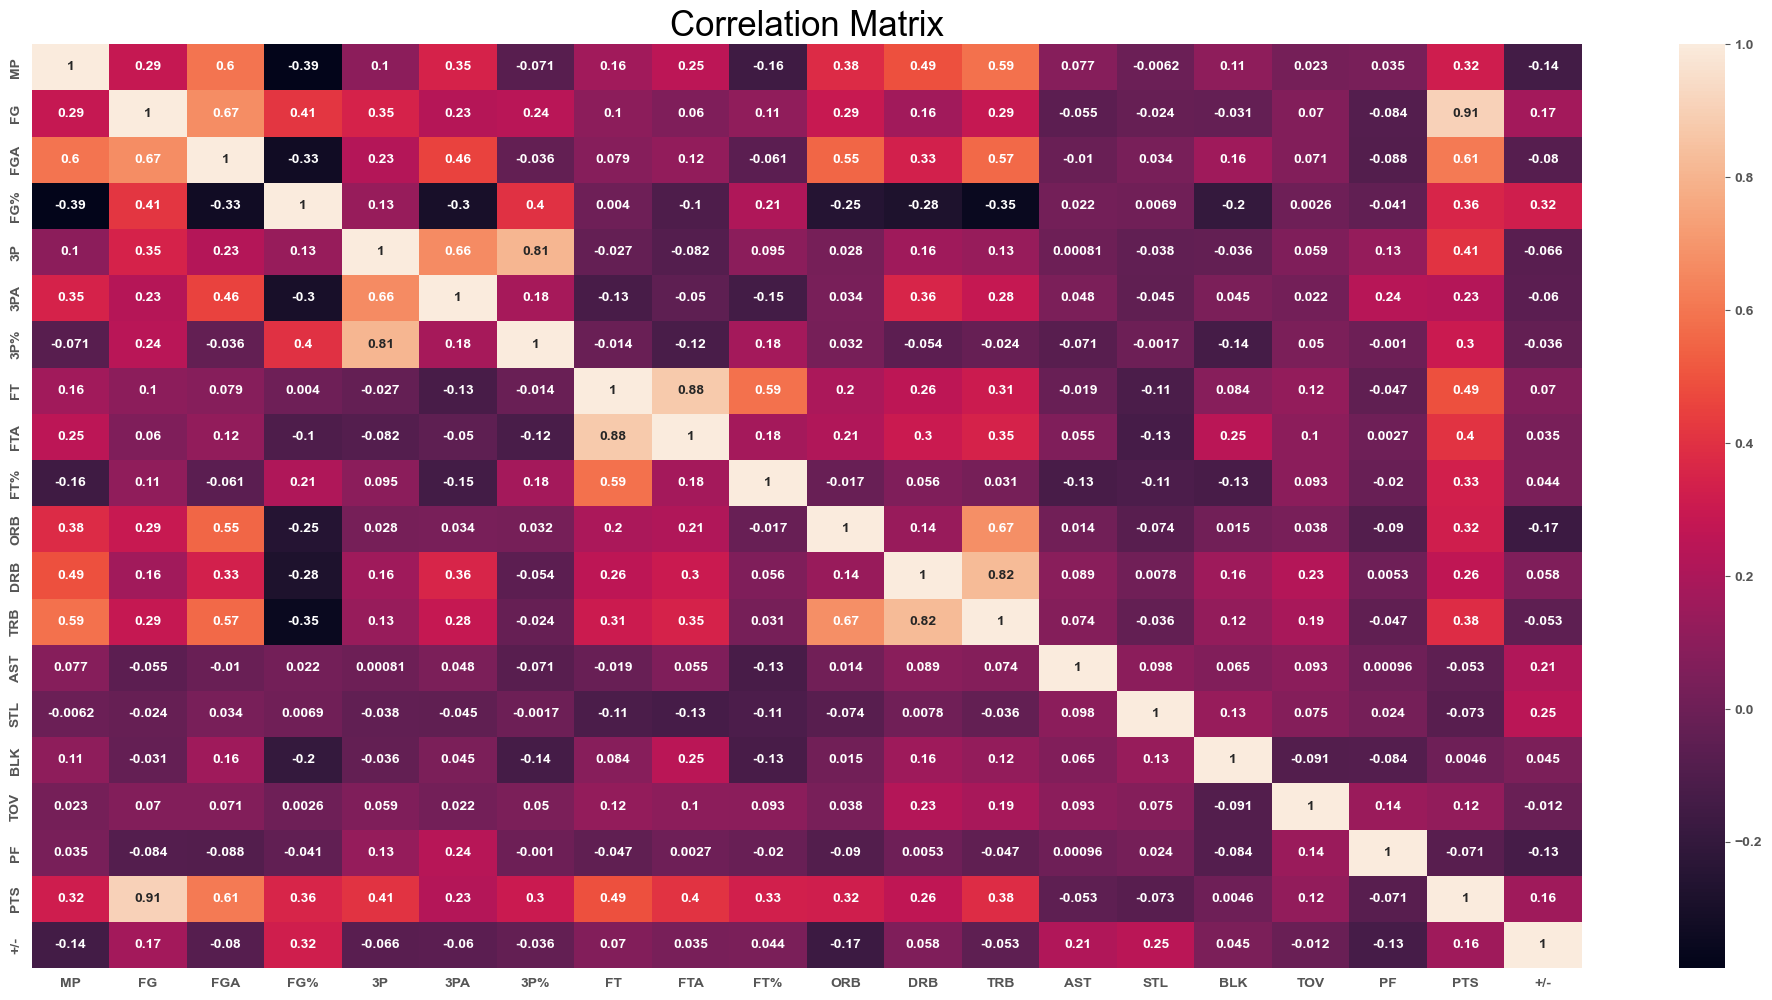

In [119]:
plt.figure(figsize=(25, 12))
style.use('ggplot')
sns.heatmap(numeric_df.corr(), annot=True);
plt.title("Correlation Matrix", color='black', fontsize=25);

Here's the interpretation of the heatmap. It shows the relationship between two variables.

1. **Strong Positive Correlation**:
   - A coefficient close to 1 indicates a strong positive linear relationship.
   - Additionally, if the correlation coefficient is 0.9, it suggests that as one variable increases, the other tends to increase as well. For example the FG and PTS and strongly correlated.

2. **Moderate Positive Correlation**:
   - A coefficient between 0.5 and 0.8 suggests a moderate positive correlation.
   - It indicates that the variables move together, but not as strongly as in a strong positive correlation.

3. **Weak or No Correlation**:
   - A coefficient close to 0 (between -0.1 and 0.1) implies little to no linear relationship.
   - Variables are essentially independent of each other.
   - For example, a correlation coefficient of 0.05 indicates weak or negligible correlation.

4. **Moderate Negative Correlation**:
   - A coefficient between -0.5 and -0.8 suggests a moderate negative correlation.
   - It means that as one variable increases, the other tends to decrease.

5. **Strong Negative Correlation**:
   - A coefficient close to -1 indicates a strong negative linear relationship.
   - For instance, if the correlation coefficient is -0.9, it implies that as one variable increases, the other significantly decreases.



### Line Chart Showing his point Trend Over The Season

In [120]:
gordon_line_group_df = gordon_regular_season_df.groupby(["Date"])[['PTS']].sum().astype(int)
gordon_line_group_df



,PTS
Date,
1/1/2024,10
1/10/2024,12
1/12/2024,15
1/14/2024,20
1/16/2024,16
...,...
4/10/2024,5
4/12/2024,13
4/14/2024,15


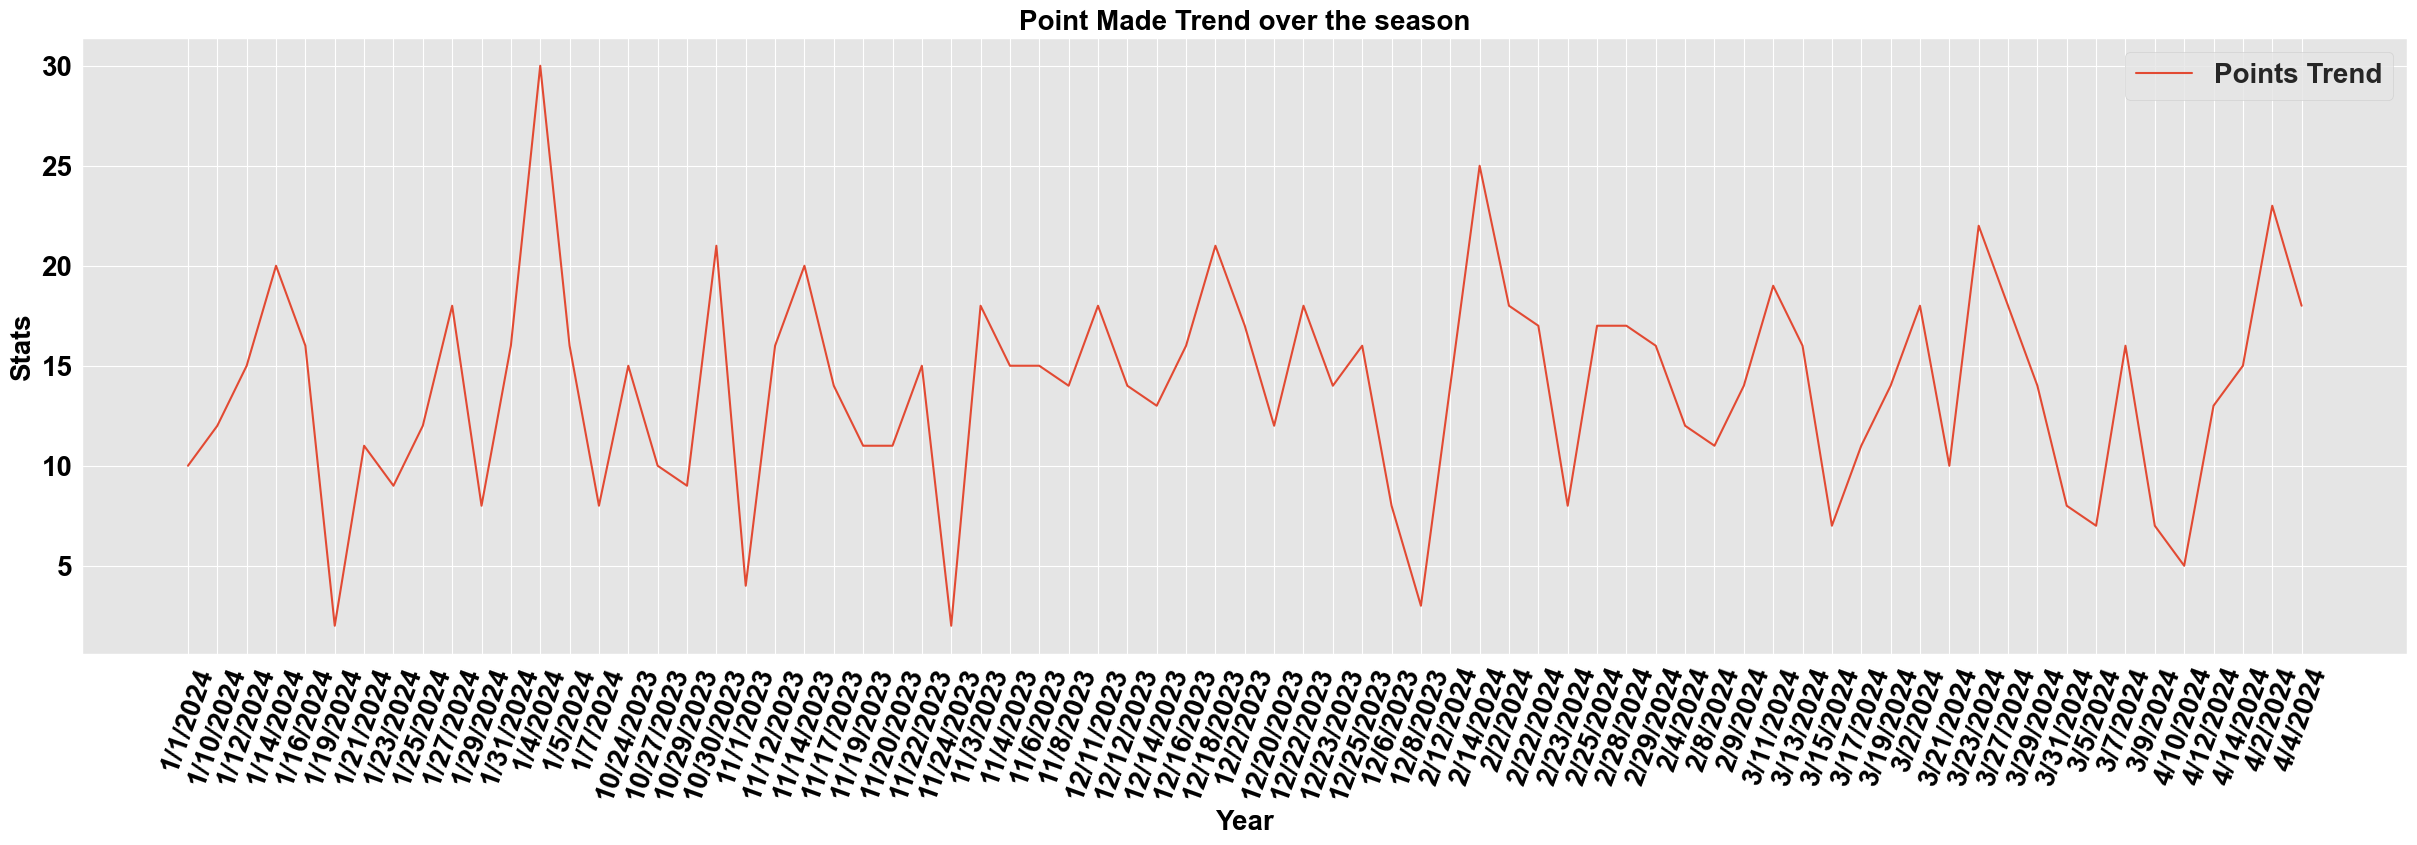

In [121]:
plt.figure(figsize=(30, 8))

# Plot the lines for each stats
plt.plot(gordon_line_group_df.index, gordon_line_group_df['PTS'],  label='Points Trend',)


# Customize the plot
plt.title('Point Made Trend over the season',fontsize=20, fontweight='bold',color='black')
plt.xlabel('Year',color='black',fontsize=20, fontweight='bold')
plt.xticks( rotation=70,fontsize=20, fontweight='bold',color='black')
plt.yticks(fontsize=20, fontweight='bold',color='black')

plt.ylabel('Stats',color='black',fontsize=20, fontweight='bold')
plt.legend(fontsize=20)

# Show the plot
plt.grid(True)
plt.show()

While i am able to uncover some insight on his regular season games, in this section, i’ll dissect his postseason statistics, aiming to discover valuable insights of his playoff series to see if there is improvements in in statistics.

# Playoffs

In [149]:
gordon_playoff = gordon_playoffs_df.loc[9:].reset_index(drop=True)
gordon_playoff

,NAME,DATE,TM,Unnamed: 3,OPP,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,+/-,POS
0,Aaron Gordon,4/20/2024,DEN,vs,LAL Gm1,32,12,11,7,0,0,1,5,11,45.5,0,3,0.0,2,2,100.0,2,20,PF
1,Aaron Gordon,4/22/2024,DEN,vs,LAL Gm2,40,14,7,3,0,0,1,5,10,50.0,0,2,0.0,4,4,100.0,3,-4,PF
2,Aaron Gordon,4/25/2024,DEN,@,LAL Gm3,41,29,15,3,1,0,2,12,18,66.7,0,1,0.0,5,6,83.3,0,3,PF
3,Aaron Gordon,4/27/2024,DEN,@,LAL Gm4,42,7,3,4,1,0,2,3,7,42.9,0,2,0.0,1,2,50.0,1,-6,PF
4,Aaron Gordon,4/29/2024,DEN,vs,LAL Gm5,46,7,13,6,1,1,3,3,7,42.9,1,2,50.0,0,0,NaN,2,3,PF
5,Aaron Gordon,5/4/2024,DEN,vs,MIN Gm1,33,9,3,6,2,0,1,4,6,NaN,0,1,0.0,1,3,NaN,4,-23,PF
6,Aaron Gordon,5/6/2024,DEN,vs,MIN Gm2,33,20,4,2,1,0,1,8,14,57.1,3,5,60.0,1,2,50.0,2,-33,NaN
7,Aaron Gordon,5/10/2024,DEN,@,MIN Gm3,33,13,2,5,2,0,0,5,7,71.4,3,4,75.0,0,0,NaN,2,18,NaN
8,Aaron Gordon,5/12/2024,DEN,@,MIN Gm4,41,27,7,6,1,2,2,11,12,91.7,2,2,100.0,3,3,100.0,4,9,NaN
9,Aaron Gordon,5/14/2024,DEN,vs,MIN Gm5,34,18,10,5,1,0,2,7,14,50.0,0,1,0.0,4,4,100.0,2,8,NaN


In [124]:
gordon_playoff.describe()

,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,+/-
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,11.000000,12.000000,12.000000,8.00000,12.000000,12.000000
mean,37.083333,14.333333,7.250000,4.416667,0.833333,0.583333,1.500000,5.750000,9.833333,55.936364,0.916667,2.250000,30.454545,1.916667,2.333333,85.41250,2.333333,-3.833333
std,5.517877,7.843160,4.266679,1.676486,0.717741,0.996205,0.797724,3.165869,4.018895,15.524128,1.240112,1.484771,37.446932,1.729862,1.825742,22.60382,1.435481,17.335373
min,28.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,5.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.00000,0.000000,-33.000000
25%,33.000000,8.500000,3.750000,3.000000,0.000000,0.000000,1.000000,3.750000,7.000000,44.200000,0.000000,1.000000,0.000000,0.750000,1.500000,74.97500,1.750000,-16.250000
50%,37.000000,12.500000,7.000000,4.500000,1.000000,0.000000,1.500000,5.000000,8.500000,50.000000,0.000000,2.000000,0.000000,1.500000,2.000000,100.00000,2.000000,-0.500000
75%,41.250000,18.500000,10.250000,6.000000,1.000000,1.000000,2.000000,7.250000,12.500000,61.900000,2.000000,3.250000,55.000000,3.250000,3.250000,100.00000,3.250000,8.250000
max,46.000000,29.000000,15.000000,7.000000,2.000000,3.000000,3.000000,12.000000,18.000000,91.700000,3.000000,5.000000,100.000000,5.000000,6.000000,100.00000,5.000000,20.000000


In [125]:
# Dropping the columns that are irrelevant. 
playoff_stat_summary = gordon_playoff.describe()
playoff_stat_summary.drop(columns=['FG%'], inplace=True)
playoff_stat_summary.drop(columns=['3P%'], inplace=True)
playoff_stat_summary.drop(columns=['FT%'], inplace=True)

In [126]:
# Removed the count 
playoffs_heatmap = (playoff_stat_summary.loc[[ 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]).astype(int)
playoffs_heatmap

,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,3PM,3PA,FTM,FTA,PF,+/-
mean,37,14,7,4,0,0,1,5,9,0,2,1,2,2,-3
std,5,7,4,1,0,0,0,3,4,1,1,1,1,1,17
min,28,4,2,2,0,0,0,2,5,0,0,0,0,0,-33
25%,33,8,3,3,0,0,1,3,7,0,1,0,1,1,-16
50%,37,12,7,4,1,0,1,5,8,0,2,1,2,2,0
75%,41,18,10,6,1,1,2,7,12,2,3,3,3,3,8
max,46,29,15,7,2,3,3,12,18,3,5,5,6,5,20


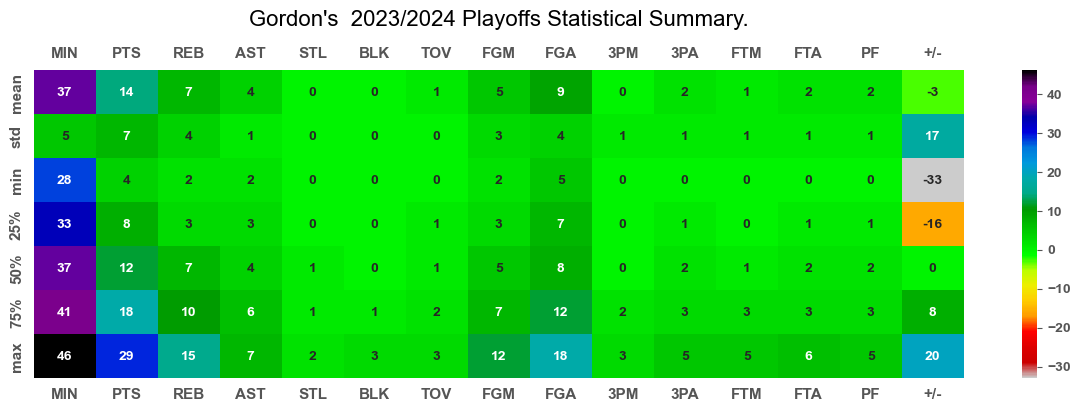

In [127]:
style.use('ggplot')
plt.figure(figsize=(15, 4))
plt.tick_params(axis='both', which='major', labelsize=11,labelbottom=True, bottom=False, top=False, labeltop=True)


sns.heatmap(playoffs_heatmap, annot=True,fmt="d",  cmap='nipy_spectral_r').set_title("Gordon's  2023/2024 Playoffs Statistical Summary.", fontdict={'size': 16},pad=15, color='#000' );

This color-coded chart and numbers provides valuable insights into the aaron's performance during the postseason/playoffs representing the flowing out and in of the playoff intensity. 

For the 12 playoff games played before their exodus from the season:

### **Points (PTS):**
- On average, the A.Gordon scored around **14** points per game.
- The highest point total achieved during a single playoff game was **29**.
- The lowest and poorest points was **4** and recorded a deficit **+/-** as low as **-33**.


### **Shooting Efficiency::**
- He was able to average atleast **9 field goals attemps** per game.
- His highest and lowest **FGA** are **18 and 5** respectively.
- 5 field goals made per game on average, highest field goal made = 12, while 2 at lowest.
- The three-point shooting percentage (3P%) fluctuated, impacting overall scoring.

### **Rebounds (REB):**
- His rebounding performance varied significantly.
- The maximum rebounds in a game reached **15, while the minimum was 2**.
- On average, rebounds per game hovered around **7**.

### **Assists (AST):**

- The highest assist count was **7**, and the lowest was **2**.
- The average assists per game stood at approximately **4**.






In [157]:
heatmap_corrs = gordon_playoff.drop(columns=['NAME',"DATE","TM", "Unnamed: 3", "OPP", "POS"])

heatmap_corrs.corr()

,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,+/-
MIN,1.000000,-0.042712,0.234580,-0.131850,-0.042083,-0.092338,0.464692,0.016913,-0.019814,-0.115468,-0.344313,-0.557586,-0.008741,-0.008730,-0.039104,-0.227856,0.156856,0.226035
PTS,-0.042712,1.000000,0.391191,-0.066833,0.139959,0.007757,0.116239,0.992185,0.881572,0.765258,0.246128,0.117098,0.252838,0.725883,0.702577,0.159316,-0.293376,0.189444
REB,0.234580,0.391191,1.000000,0.212879,-0.311702,0.090899,0.627672,0.395396,0.559324,-0.047534,-0.322150,-0.211665,-0.238338,0.557345,0.431797,0.567704,-0.460131,0.365655
AST,-0.131850,-0.066833,0.212879,1.000000,0.289612,0.058969,0.169940,-0.047103,-0.150669,0.185683,-0.069234,-0.009130,0.071279,-0.080980,-0.108903,0.552373,0.050367,0.557315
STL,-0.042083,0.139959,-0.311702,0.289612,1.000000,-0.360237,-0.158777,0.180036,-0.010505,0.464281,0.289385,0.042653,0.211359,-0.231863,-0.023125,-0.534405,-0.029412,0.090113
BLK,-0.092338,0.007757,0.090899,0.058969,-0.360237,1.000000,0.400381,-0.036031,-0.268695,0.288833,0.337271,0.138287,0.560202,-0.074733,-0.216591,0.388107,0.105952,-0.248291
TOV,0.464692,0.116239,0.627672,0.169940,-0.158777,0.400381,1.000000,0.125988,0.170137,-0.100670,-0.229738,-0.268635,-0.025159,0.230574,0.187256,0.076169,-0.317554,-0.013148
FGM,0.016913,0.992185,0.395396,-0.047103,0.180036,-0.036031,0.125988,1.000000,0.882419,0.749296,0.202610,0.053185,0.229314,0.693042,0.692034,0.100317,-0.260052,0.206229
FGA,-0.019814,0.881572,0.559324,-0.150669,-0.010505,-0.268695,0.170137,0.882419,1.000000,0.378329,-0.003040,0.053322,-0.120729,0.769330,0.751643,0.010204,-0.446479,0.198775
FG%,-0.115468,0.765258,-0.047534,0.185683,0.464281,0.288833,-0.100670,0.749296,0.378329,1.000000,0.563742,0.228894,0.698873,0.299600,0.277999,0.246030,0.037360,0.223907


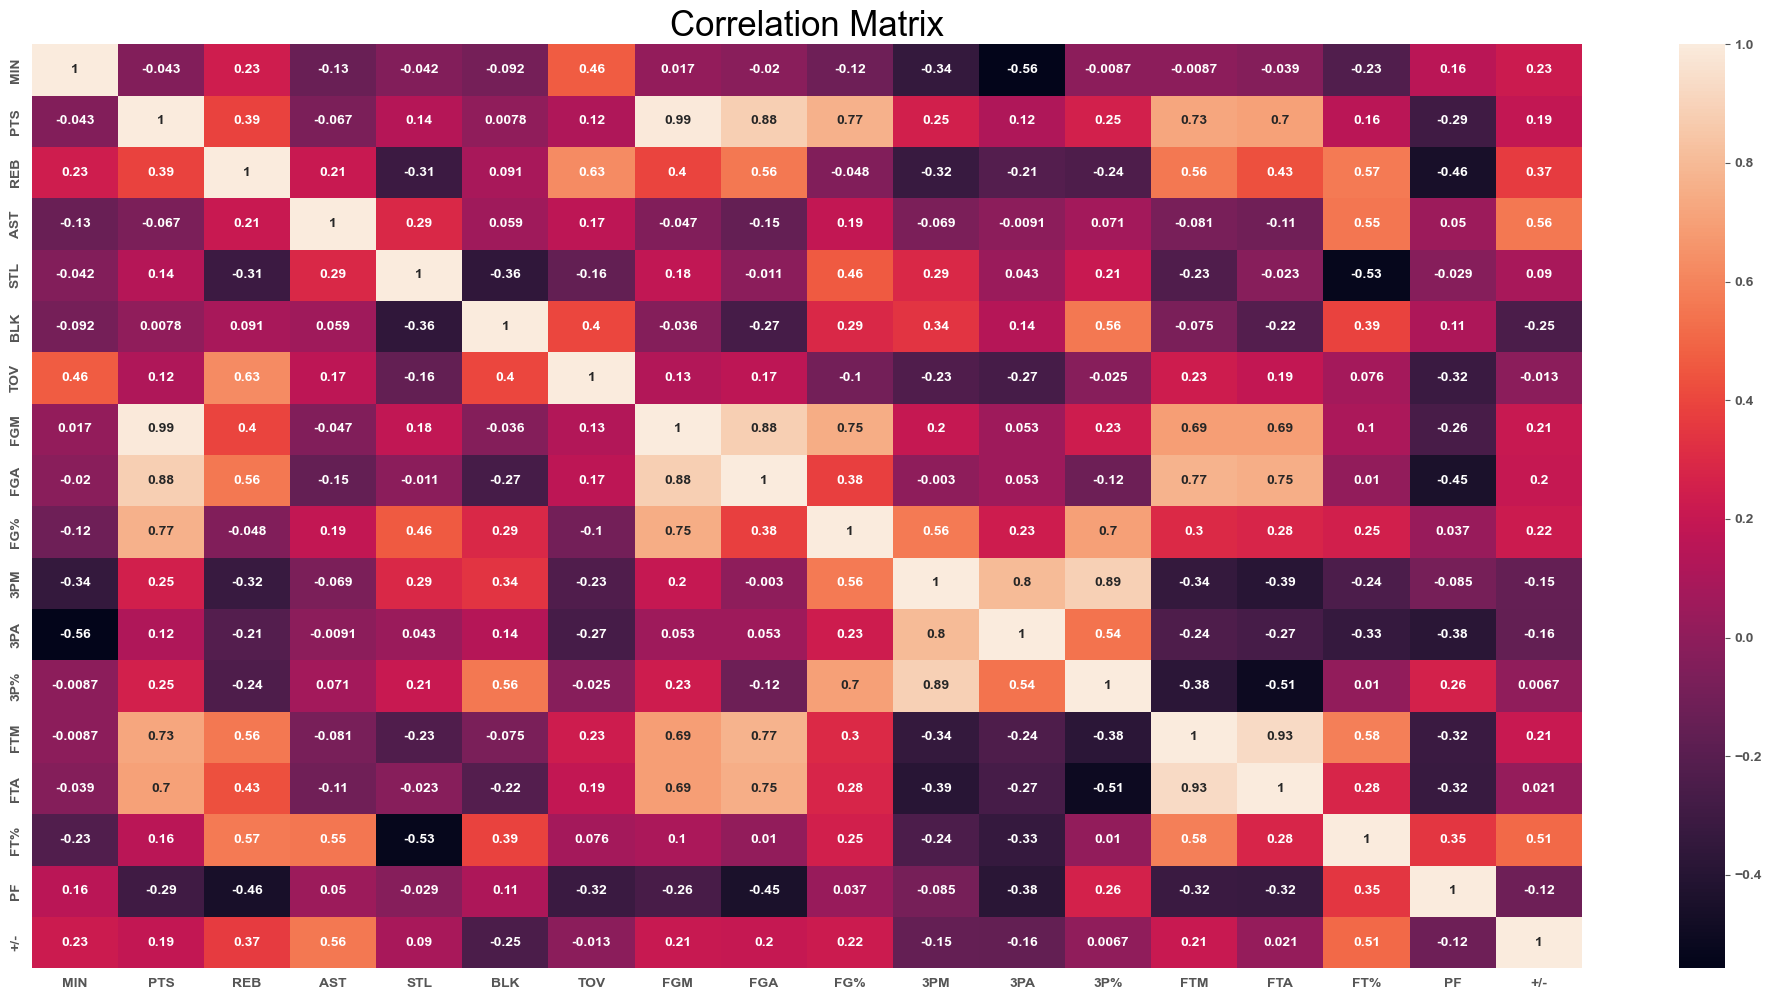

In [158]:
plt.figure(figsize=(25, 12))
style.use('ggplot')
sns.heatmap(heatmap_corrs.corr(), annot=True);
plt.title("Correlation Matrix", color='black', fontsize=25);

# Performance Trend

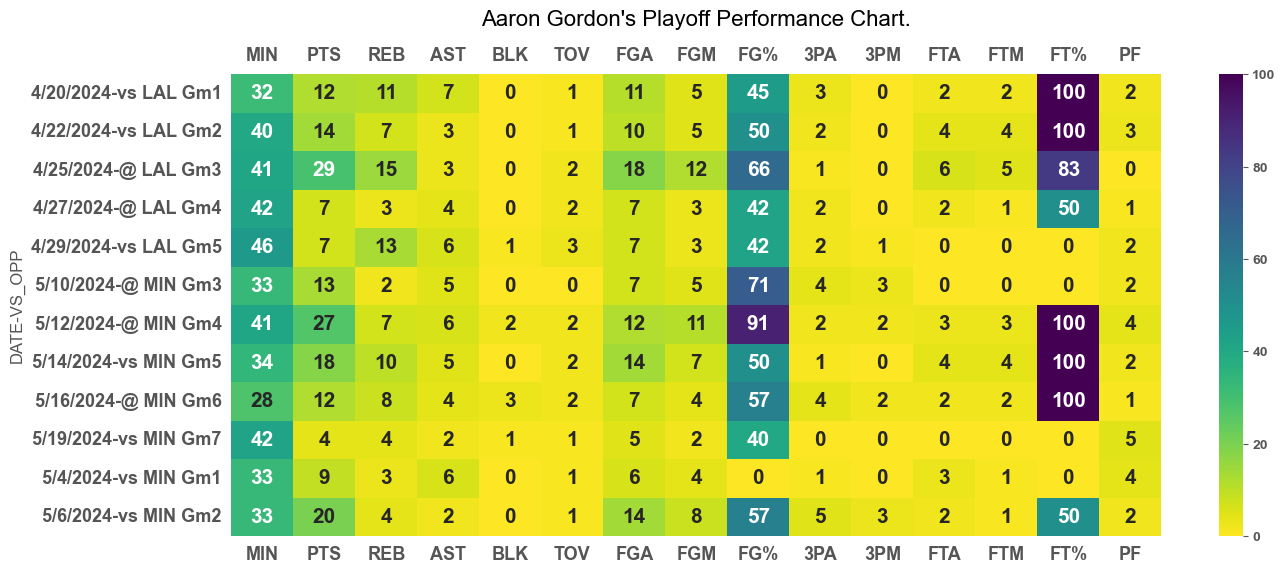

In [164]:
def performance_trend():
    gordon_playoff["VS_OPP"] = gordon_playoff["Unnamed: 3"]+' '+gordon_playoff["OPP"] 
    gordon_group_df = gordon_playoff.groupby(["DATE","VS_OPP"])[["MIN",'PTS','REB','AST', 'BLK','TOV', 'FGA', 'FGM',
                                                                                    'FG%', '3PA', '3PM', 'FTA', 'FTM', 'FT%', 'PF']].sum().astype(int)
    
    
    
    style.use('ggplot')
    plt.figure(figsize=(15, 6))
    plt.tick_params(axis='both', which='major', labelsize=13,labelbottom=True, bottom=False, top=False, labeltop=True)


    sns.heatmap(gordon_group_df, annot=True,fmt="d",  cmap='viridis_r', annot_kws={"size":15}).set_title("Aaron Gordon's Playoff Performance Chart.", fontdict={'size': 16},pad=15, color='#000' );
    
    
performance_trend()
    

This chart tracks the performance of the Aaron Gordon during the  playoff series.
- The dates range from April 20th to May 19th.
- Each game is represented by a row, and columns display various performance metrics:


**Insights from the 12 playoff games played:**

### **Points (PTS):**

- The highest point achieved  **29** game 3 against Lakers.
- The lowest points **4** against Minnesota Timberwolves in game 7.


### **Shooting Efficiency:**
- He was on fire 🔥 in game 4  where he recorded **11/12 field goals, 27 Points, 7 Assists, 2 Blocks and 100% 3 Points and Free throws percentage.**

### **Rebounds (REB):**

- The max series rebounds in a game 3 against Lakers was **15**, while the minimum was **3** against Wolves game 3.


### **Best Games Of The Series:**
- Game 3 against Lakers playing **41 Minutes, 29 Points, 15 Rebounds and 3 Assists.**
- Game 4 against Wolves recorded **41 Minutes, 27 Points, 7 Rebounds, 6 Assists, 2 Blocks, and 11/12 field goals**


# Point Trends

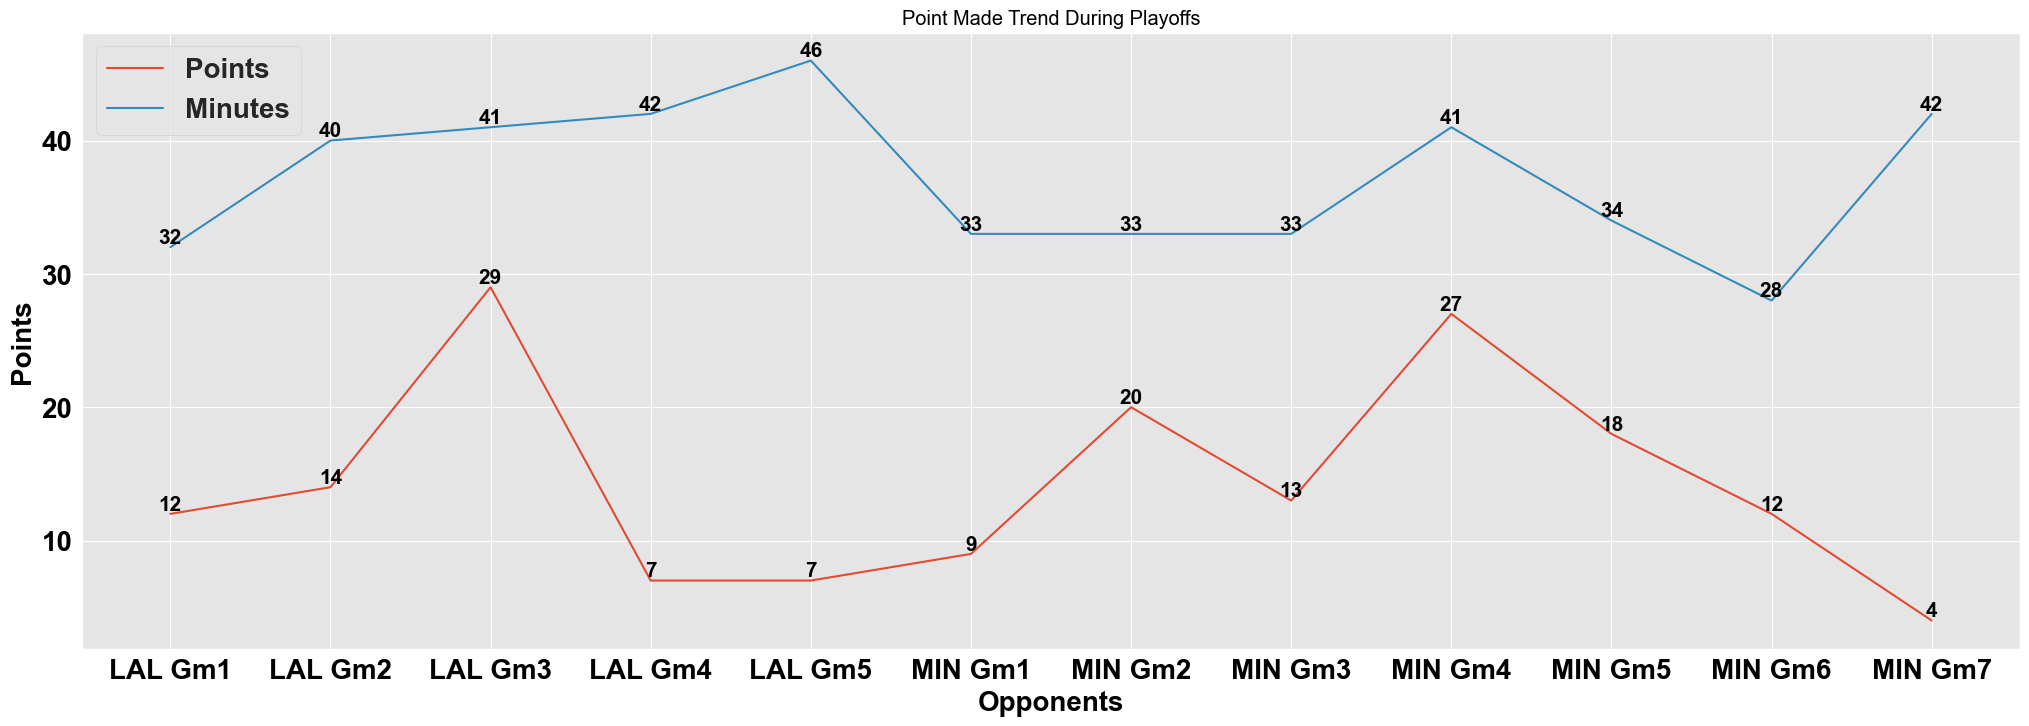

In [143]:
def points_trend():
    style.use('ggplot')
    plt.figure(figsize=(25, 8))

    # Plot the lines for each region  nuggets_playoff[ 'OPP_PTS']
    plt.plot(gordon_playoff.OPP, gordon_playoff['PTS'],  label='Points',)
    plt.plot(gordon_playoff.OPP, gordon_playoff['MIN'],  label='Minutes',)
    


    # Add data labels to each point
    for x, y in zip(gordon_playoff.OPP, gordon_playoff['PTS']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=15, color='black')
        
        
        
    # Add data labels to each point
    for x, y in zip(gordon_playoff.OPP, gordon_playoff['MIN']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=15, color='black')    


    # Customize the plot
    plt.title('Point Made Trend During Playoffs',color='black')
    plt.xlabel('Opponents',fontsize=20, fontweight='bold',color='black')
    plt.xticks(fontsize=20, fontweight='bold',color='black')
    plt.yticks(fontsize=20, fontweight='bold',color='black')

    plt.ylabel('Points',fontsize=20, fontweight='bold',color='black')
    plt.legend(fontsize=20)

    # Show the plot
    plt.grid(True)
    plt.show()
    
points_trend()  

In [163]:
gordon_playoff['MIN'].corr(gordon_playoff['PTS'])

-0.04271228528614619

The correlation coefficient between Aaron Gordon's playoff minutes **MIN** and points **PTS** is approximately -0.04. This value indicates a very weak negative relationship between the two variables. In other words, as minutes increase, there is a slight tendency for points scored to decrease.



## Insights from the Line Chart

**Scoring Trends**: The red line (labeled "Points") represents the points scored during the playoff games. The blue line (labeled "Minutes") represents the minutes played for each game. It is crystal clear  how his scoring performance fluctuated across playoff games.

**Observations**: The higer the minutes the lower the points.
 


In [144]:
gordon_playoff['Year']    = pd.DatetimeIndex(gordon_playoff["DATE"]).year
gordon_playoff['Month']   = pd.DatetimeIndex(gordon_playoff["DATE"]).month
gordon_playoff['Day']     = pd.DatetimeIndex(gordon_playoff["DATE"]).day
gordon_playoff['Weekday'] = pd.DatetimeIndex(gordon_playoff["DATE"]).weekday

# Versus Lakers

In [39]:
# Query the rows for May
gordon_playoff_april = gordon_playoff[gordon_playoff.Month == 4]
gordon_playoff_april

,NAME,DATE,TM,Unnamed: 3,OPP,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,+/-,POS,VS_OPP,Year,Month,Day,Weekday
0,Aaron Gordon,4/20/2024,DEN,vs,LAL Gm1,32,12,11,7,0,0,1,5,11,45.5,0,3,0.0,2,2,100.0,2,20,PF,vs LAL Gm1,2024,4,20,5
1,Aaron Gordon,4/22/2024,DEN,vs,LAL Gm2,40,14,7,3,0,0,1,5,10,50.0,0,2,0.0,4,4,100.0,3,-4,PF,vs LAL Gm2,2024,4,22,0
2,Aaron Gordon,4/25/2024,DEN,@,LAL Gm3,41,29,15,3,1,0,2,12,18,66.7,0,1,0.0,5,6,83.3,0,3,PF,@ LAL Gm3,2024,4,25,3
3,Aaron Gordon,4/27/2024,DEN,@,LAL Gm4,42,7,3,4,1,0,2,3,7,42.9,0,2,0.0,1,2,50.0,1,-6,PF,@ LAL Gm4,2024,4,27,5
4,Aaron Gordon,4/29/2024,DEN,vs,LAL Gm5,46,7,13,6,1,1,3,3,7,42.9,1,2,50.0,0,0,NaN,2,3,PF,vs LAL Gm5,2024,4,29,0


# Field goals, attempted made and percentages  against Lakers.

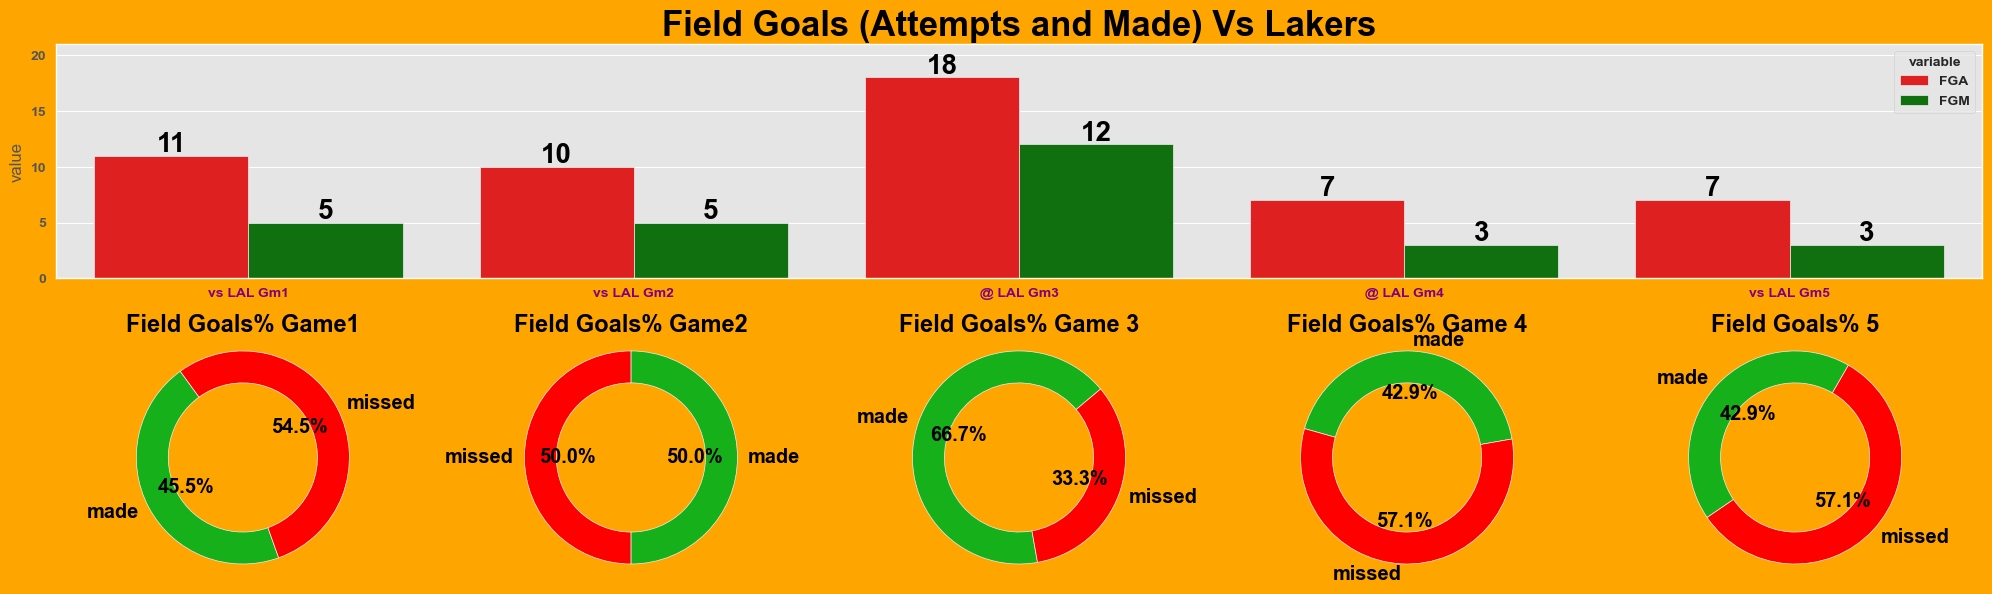

In [40]:
# Define the fg_percent function to return data
def fg_percent(fg_made, fg_attempted):
    made_percentage = (fg_made / fg_attempted) * 100
    missed_percentage = 100 - made_percentage
    labels = ['made', 'missed']
    sizes = [made_percentage, missed_percentage]
    colors = ['#15B01A', 'red']
    return {'sizes': sizes, 'labels': labels, 'colors': colors}

# Create a figure
fig = plt.figure(figsize=(20, 18),facecolor='orange')

# Set the spacing between subplots
plt.subplots_adjust(hspace=20)  # Adjust the value as needed

# Define the grid layout
gs = gridspec.GridSpec(6, 5, width_ratios=[1, 1, 1, 1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0,:])  # Adjust the width for ax1
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[1, 3])
ax6 = fig.add_subplot(gs[1, 4])

#######################################################################################
##########################    FIELD GOALS         #####################################
#######################################################################################
# Melting  the DataFrame to create a clean format
gordon_playoff_melted = pd.melt(gordon_playoff_april , id_vars='VS_OPP', value_vars=['FGA', 'FGM'])
colors= ['red', 'green']
sns.barplot(data=gordon_playoff_melted, x='VS_OPP', y='value', hue="variable", palette=colors, ax=ax1)

# Add value labels on top of each bar
for p in ax1.patches:
    height = p.get_height()
    
    ax1.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                ha='center', va='center', fontsize=20, color='black', fontweight='bold')
    
# Customize the plot
ax1.set_ylim(0, 21)  # Use set_ylim instead of ylim
ax1.set_title('Field Goals (Attempts and Made) Vs Lakers',  fontweight='bold', color='black',fontsize=25,)
ax1.set_xlabel('',fontsize=15, fontweight='bold', color='black')
# Set the x-axis tick label color to purple
ax1.tick_params(axis='x', colors='purple',)
#######################################################################################
# Plot the pie chart for ax2
data1 = fg_percent(gordon_playoff_april.iloc[0, 12],gordon_playoff_april.iloc[0, 13])
ax2.pie(data1['sizes'], labels=data1['labels'],
        colors=data1['colors'],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%', 
        textprops={'size': 'x-large', 'color': 'black'},startangle=126)
ax2.set_title('Field Goals% Game1',fontweight='bold',fontsize=17,color='black')
ax2.axis('equal')
########################################################################################

# Plot the pie chart for ax3
data2 = fg_percent(gordon_playoff_april.iloc[1, 12], gordon_playoff_april.iloc[1, 13])
ax3.pie(data2['sizes'], labels=data2['labels'], 
        colors=data2['colors'], 
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',  
        textprops={'size': 'x-large', 'color': 'black'},startangle=270)
ax3.set_title('Field Goals% Game2',fontweight='bold',fontsize=17,color='black')
ax3.axis('equal')
#######################################################################################
# Plot the pie chart for ax4
data3 = fg_percent(gordon_playoff_april.iloc[2, 12], gordon_playoff_april.iloc[2, 13])
ax4.pie(data3['sizes'], labels=data3['labels'],
        colors=data3['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%', startangle=40,
        textprops={'size': 'x-large', 'color': 'black'})
ax4.set_title('Field Goals% Game 3',fontweight='bold',fontsize=17,color='black')
ax4.axis('equal')
#######################################################################################
# Plot the pie chart for ax5
data4 = fg_percent(gordon_playoff_april.iloc[3, 12], gordon_playoff_april.iloc[3, 13])
ax5.pie(data4['sizes'], labels=data4['labels'], 
        colors=data4['colors'], 
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%', startangle=10,
        textprops={'size': 'x-large', 'color': 'black'})
ax5.set_title('Field Goals% Game 4',fontweight='bold',fontsize=17,color='black')
ax5.axis('equal')
#######################################################################################
# Plot the pie chart for ax6
data5 = fg_percent(gordon_playoff_april["FGM"][4], gordon_playoff_april["FGA"][4])
ax6.pie(data5['sizes'], labels=data5['labels'], 
        colors=data5['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',
        textprops={'size': 'x-large', 'color': 'black'},
        startangle=60)
ax6.set_title('Field Goals% 5',fontweight='bold',fontsize=17,color='black')
ax6.axis('equal')

#plt.tight_layout()
fig.tight_layout(pad=1)

# Show the plot
plt.show()

#xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller


This image above shows his field goal performance against the lakers.

**Shot Attempts and Efficiency:** 
 - In Game 1, Game 2 and Game 3, Aaron efficiencies for these game was above 50% and had his best field goal in Game 3 scoring up to 66% (FG%).
 
 - In Game 4 and 5, he had 7 attempted field goals and 3 field goals made. His efficiency was below average.

Aaron Gordon performance varies across all these games. Consistency fluctuates.

His efficiency dropped in **Game 4** may be due to shot selection or lakers defense on him.

**Practice Focus:** 
 - Refine his shooting skills.
 - Work on accuracy during practice.
 - Adjust strategy base on opponents.

# Versus Minnesota Timberwolves

In [41]:
# Query the rows for May
gordon_playoff_may = gordon_playoff[gordon_playoff.Month == 5]
gordon_playoff_may

,NAME,DATE,TM,Unnamed: 3,OPP,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,+/-,POS,VS_OPP,Year,Month,Day,Weekday
5,Aaron Gordon,5/4/2024,DEN,vs,MIN Gm1,33,9,3,6,2,0,1,4,6,NaN,0,1,0.0,1,3,NaN,4,-23,PF,vs MIN Gm1,2024,5,4,5
6,Aaron Gordon,5/6/2024,DEN,vs,MIN Gm2,33,20,4,2,1,0,1,8,14,57.1,3,5,60.0,1,2,50.0,2,-33,NaN,vs MIN Gm2,2024,5,6,0
7,Aaron Gordon,5/10/2024,DEN,@,MIN Gm3,33,13,2,5,2,0,0,5,7,71.4,3,4,75.0,0,0,NaN,2,18,NaN,@ MIN Gm3,2024,5,10,4
8,Aaron Gordon,5/12/2024,DEN,@,MIN Gm4,41,27,7,6,1,2,2,11,12,91.7,2,2,100.0,3,3,100.0,4,9,NaN,@ MIN Gm4,2024,5,12,6
9,Aaron Gordon,5/14/2024,DEN,vs,MIN Gm5,34,18,10,5,1,0,2,7,14,50.0,0,1,0.0,4,4,100.0,2,8,NaN,vs MIN Gm5,2024,5,14,1
10,Aaron Gordon,5/16/2024,DEN,@,MIN Gm6,28,12,8,4,0,3,2,4,7,57.1,2,4,50.0,2,2,100.0,1,-27,NaN,@ MIN Gm6,2024,5,16,3
11,Aaron Gordon,5/19/2024,DEN,vs,MIN Gm7,42,4,4,2,0,1,1,2,5,40.0,0,0,NaN,0,0,NaN,5,-14,NaN,vs MIN Gm7,2024,5,19,6


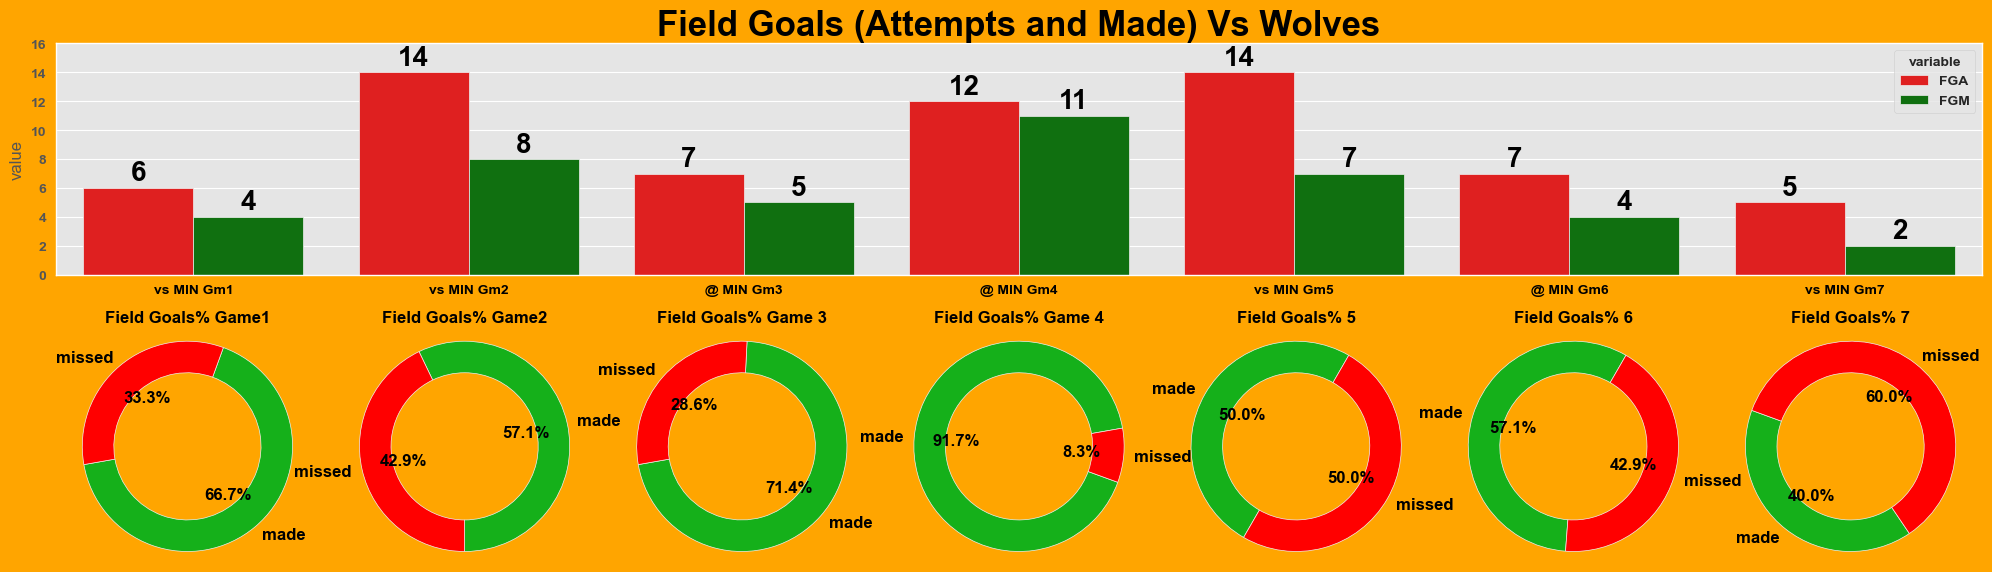

In [42]:
style.use('ggplot')
# Define the fg_percent function to return data
def fg_percent(fg_made, fg_attempted):
    made_percentage = (fg_made / fg_attempted) * 100
    missed_percentage = 100 - made_percentage
    labels = ['made', 'missed']
    sizes = [made_percentage, missed_percentage]
    colors = ['#15B01A', 'red']
    return {'sizes': sizes, 'labels': labels, 'colors': colors}

# Create a figure
fig = plt.figure(figsize=(20, 6),facecolor='orange')

# Set the spacing between subplots
plt.subplots_adjust(hspace=20)  # Adjust the value as needed

# Define the grid layout
gs = gridspec.GridSpec(2, 7, width_ratios=[1, 1, 1, 1, 1, 1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0,:])  # Adjust the width for ax1
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[1, 3])
ax6 = fig.add_subplot(gs[1, 4])
ax7 = fig.add_subplot(gs[1, 5])  
ax8 = fig.add_subplot(gs[1, 6])



#######################################################################################
##########################    FIELD GOALS         #####################################
#######################################################################################
# Melting  the DataFrame to create a clean format
gordon_playoff_melted = pd.melt(gordon_playoff_may , id_vars='VS_OPP', value_vars=['FGA', 'FGM'])
colors= ['red', 'green']
sns.barplot(data=gordon_playoff_melted, x='VS_OPP', y='value', hue="variable", palette=colors, ax=ax1)

# Add value labels on top of each bar
for p in ax1.patches:
    height = p.get_height()
    
    ax1.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height+1),
                ha='center', va='center', fontsize=20, color='black', fontweight='bold')
    
# Customize the plot
ax1.set_ylim(0, 16)  # Use set_ylim instead of ylim
ax1.set_title('Field Goals (Attempts and Made) Vs Wolves',  fontweight='bold', color='black',fontsize=25,)
ax1.set_xlabel('',fontsize=15, fontweight='bold', color='black')
# Set the x-axis tick label color to purple
ax1.tick_params(axis='x', colors='black')
#######################################################################################
# Plot the pie chart for ax2
data1 = fg_percent(gordon_playoff_may["FGM"][5], gordon_playoff_may["FGA"][5])
ax2.pie(data1['sizes'], labels=data1['labels'],
        colors=data1['colors'],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%', 
        textprops={'size': 'large', 'color': 'black'},startangle=190)
ax2.set_title('Field Goals% Game1',fontweight='bold',fontsize=12,color='black')
ax2.axis('equal')
########################################################################################

# Plot the pie chart for ax3
data2 = fg_percent(gordon_playoff_may["FGM"][6], gordon_playoff_may["FGA"][6])
ax3.pie(data2['sizes'], labels=data2['labels'], 
        colors=data2['colors'], 
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',  
        textprops={'size': 'large', 'color': 'black'},startangle=270)
ax3.set_title('Field Goals% Game2',fontweight='bold',fontsize=12,color='black')
ax3.axis('equal')
#######################################################################################
# Plot the pie chart for ax4
data3 = fg_percent(gordon_playoff_may["FGM"][7], gordon_playoff_may["FGA"][7])
ax4.pie(data3['sizes'], labels=data3['labels'],
        colors=data3['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%', startangle=190,
        textprops={'size': 'large', 'color': 'black'})
ax4.set_title('Field Goals% Game 3',fontweight='bold',fontsize=12,color='black')
ax4.axis('equal')
#######################################################################################
# Plot the pie chart for ax5
data4 = fg_percent(gordon_playoff_may["FGM"][8], gordon_playoff_may["FGA"][8])
ax5.pie(data4['sizes'], labels=data4['labels'], 
        colors=data4['colors'], 
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%', startangle=10,
        textprops={'size': 'large', 'color': 'black'})
ax5.set_title('Field Goals% Game 4',fontweight='bold',fontsize=12,color='black')
ax5.axis('equal')
#######################################################################################
# Plot the pie chart for ax6
data5 = fg_percent(gordon_playoff_may["FGM"][9], gordon_playoff_may["FGA"][9])
ax6.pie(data5['sizes'], labels=data5['labels'], 
        colors=data5['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',
        textprops={'size': 'large', 'color': 'black'},
        startangle=60)
ax6.set_title('Field Goals% 5',fontweight='bold',fontsize=12,color='black')
ax6.axis('equal')
#######################################################################################
# Plot the pie chart for ax7
data6 = fg_percent(gordon_playoff_may["FGM"][10], gordon_playoff_may["FGA"][10])
ax7.pie(data6['sizes'], labels=data6['labels'], 
        colors=data6['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',
        textprops={'size': 'large', 'color': 'black'},
        startangle=60)
ax7.set_title('Field Goals% 6',fontweight='bold',fontsize=12,color='black')
ax7.axis('equal')
#######################################################################################
# Plot the pie chart for ax8
data7 = fg_percent(gordon_playoff_may["FGM"][11], gordon_playoff_may["FGA"][11])
ax8.pie(data7['sizes'], labels=data7['labels'], 
        colors=data7['colors'],
        wedgeprops=dict(width=0.3), 
        autopct='%1.1f%%',
        textprops={'size': 'large', 'color': 'black'},
        startangle=160)
ax8.set_title('Field Goals% 7',fontweight='bold',fontsize=12,color='black')
ax8.axis('equal')



# Adjust layout
#plt.tight_layout()
fig.tight_layout(pad=1)
plt.grid(False)

# Show the plot
plt.show()

#xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller

Analyzing Aaron Gordon's field goal performance against the Minnesota Timberwolves.

The image shows a combination of bar and pie charts that provide a detailed breakdown of his shooting efficiency from different zones on the court.

**Field Goal Attempts and Makes**: The bar chart indicates the number of attempts (in red) and the number of successful field goals (in green) for each game. It's clear that Gordon had varying success rates from different areas, with some games seeing a higher conversion rate than others.

**Shooting Efficiency**: The pie charts give a percentage breakdown of made versus missed shots from each game. For example, in **FG game1**, Gordon missed 33.3% of his shots, indicating that around one-third of his attempts from that game were unsuccessful.

**Game Performance**: The highest shooting efficiency is seen in **FG game4**, where Gordon made 63.6% of his attempts, suggesting that this might be one of his stronger shooting zones. Conversely, **FG game7** shows a lower efficiency with only 40% of shots made caused by the tight defevisive strategy from the opposition.


# In Conclusion 

Aaron Gordon's playoff journey was marked by significant fluctuations in his performance. 

Some factors that contributed to fluctuations':


**Offensive Struggles**:
   - **Scoring Efficiency**: In Game 4 % 5 against Lakers and Game 1 % 7 against Minnesota Timberwolves , he struggled offensively which led him scoring below 10 points in each of these games. His field goal percentage was below  **50%** highlighting the difficulties in scoring.
   - **Adjustments Needed**: During the playoffs, he faced some challenge in shooting efficiency in some games. Remarkably, he did wonderfully well achieving more field goals percentage above 50%, but addressing the inefficiency is crucial for future success rate.

**Defensive Mentality**:
   - A.Gordon maintained a defensive competitiveness throughout the playoffs guarding almost all positions on the court. His outstanding performance on defense was highly remarkable.



**Practice Focus:** 
 - Refine his shooting skills.
 - Work on accuracy during practice.
 - Adjust strategy base on opponents. 
 
 
In games where he'll be facing thougher opponents he should develop a strategy on how to be very effective offensively.


Moving forward, he must focus on consistency, both offensively and defensively, to compete at the highest level in future regular and playoff seasons.